<a href="https://colab.research.google.com/github/Chi36/C.-Frank-Onwudinjo/blob/main/C_Frank_Onwudinjo__Catalysis_performance_during_dry_methane_reforming_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Study of catalysis performance during dry methane reforming with machine learning

An individual project on machine learning for the data science in chemical engineering (Fall 2024).
Name: Chimezie Frank ONWUDINJO

#Acknowledgement page

I write to acknowledge the support of all authors whose resources were consulted as well as the innovators of essential platforms instrumental to the accomplishing this capstone project.

Also worthy of my gratitude is the course instructor (Dr. Jude Okolie) whose relentless effort geared towards demystifying machine learning concepts.

My appreciation goes to the management of Bucknell University for incorporating this data science course into the chemical engineering program.
Thank you!

#Statement of AI Usage

I write to affirm that AI tools such as chatgpt and googlegemni were helpful tools especially for adjusting the codes and debugging with relevant prompts.

**Data preprocessing**

Load dataset and display first few rows

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/content/Data DRM_Git.xlsx')

# Display the first few rows
print(df.head())

             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640.0            

**Data overview**

In [2]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Catalyst                    1714 non-null   object 
 1   Ratio of CH4 in Feed        1714 non-null   float64
 2   Reaction Temperature        1714 non-null   int64  
 3   Ni Loading                  1714 non-null   float64
 4   Reaction Time               1714 non-null   float64
 5   Pore Size                   1714 non-null   float64
 6   Pore Volume                 1714 non-null   float64
 7   Surface Area                1714 non-null   float64
 8   H2-TPR Peak Temperature     1714 non-null   float64
 9   Ni Particle Size            1714 non-null   float64
 10  Ni Dispersion               658 non-null    float64
 11  Modifier Electronegativity  1714 non-null   float64
 12  GHSV                        1714 non-null   int64  
 13  CH4 Conversion              1665 

**Summary statistics**

In [3]:
# Summary statistics
print(df.describe())

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1714.000000           1714.000000  1714.000000    1714.000000   
mean               0.369862            703.477246     9.337069      16.289964   
std                0.145389             86.778888     5.714180      22.749978   
min                0.050000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.670000       7.000000   
75%                0.500000            750.000000    10.220000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1714.000000  1714.000000   1714.000000              1714.000000   
mean     11.574593     0.402755    188.477548               632.727211   
std      10.576940     0.289400    174.102440   

**Check for missing values**

In [4]:
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_excel('/content/Data DRM_Git.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)

# Check if there are any missing values in the entire DataFrame
has_missing_values = df.isnull().any().any()
print("Has missing values:", has_missing_values)

Missing values per column:
Catalyst                         0
Ratio of CH4 in Feed             0
Reaction Temperature             0
Ni Loading                       0
Reaction Time                    0
Pore Size                        0
Pore Volume                      0
Surface Area                     0
H2-TPR Peak Temperature          0
Ni Particle Size                 0
Ni Dispersion                 1056
Modifier Electronegativity       0
GHSV                             0
CH4 Conversion                  49
CO2 Conversion                  77
Syngas_Ratio                    76
dtype: int64
Has missing values: True


**Imputation for missing values**

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 1: Load the data
df = pd.read_excel('/content/Data DRM_Git.xlsx')  # Replace with your actual file path

# Step 2: Identify numerical columns (exclude non-relevant columns like 'Unnamed: 0')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Numerical columns
numerical_columns = [col for col in numerical_columns if 'Unnamed' not in col]  # Remove 'Unnamed' columns
print("Numerical columns:", numerical_columns)  # Debugging: Check the numerical columns

# Step 3: Check if there are numerical columns
if len(numerical_columns) > 0:
    # Step 4: Impute missing values for numerical columns (using median for numerical columns)
    imputer_num = SimpleImputer(strategy='median')  # Using median for numerical columns

    # Ensure that we have valid numerical columns to impute
    df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])

# Step 5: Verify the imputation for numerical columns
print("\nAfter numerical imputation, missing data summary:")
print(df.isnull().sum())  # Check if there are still any missing values

# Step 6: Save the cleaned dataset (optional)
df.to_excel('cleaned_data_no_missing_values_numerical.xlsx', index=False)  # Save the cleaned dataset to a new Excel file


Numerical columns: ['Ratio of CH4 in Feed', 'Reaction Temperature', 'Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area', 'H2-TPR Peak Temperature', 'Ni Particle Size', 'Ni Dispersion', 'Modifier Electronegativity', 'GHSV', 'CH4 Conversion', 'CO2 Conversion', 'Syngas_Ratio']

After numerical imputation, missing data summary:
Catalyst                      0
Ratio of CH4 in Feed          0
Reaction Temperature          0
Ni Loading                    0
Reaction Time                 0
Pore Size                     0
Pore Volume                   0
Surface Area                  0
H2-TPR Peak Temperature       0
Ni Particle Size              0
Ni Dispersion                 0
Modifier Electronegativity    0
GHSV                          0
CH4 Conversion                0
CO2 Conversion                0
Syngas_Ratio                  0
dtype: int64


**Recheck for missing values**

In [6]:
import pandas as pd
import numpy as np

# df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Step 1: Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Generate synthetic data for missing numerical values
for col in numerical_columns:
    # Get the column data
    data = df[col]


# Step 2: Verify the result
print(f"Data shape after imputation: {df.shape}")
print(f"Missing values after imputation:\n{df.isnull().sum()}")






Data shape after imputation: (1714, 16)
Missing values after imputation:
Catalyst                      0
Ratio of CH4 in Feed          0
Reaction Temperature          0
Ni Loading                    0
Reaction Time                 0
Pore Size                     0
Pore Volume                   0
Surface Area                  0
H2-TPR Peak Temperature       0
Ni Particle Size              0
Ni Dispersion                 0
Modifier Electronegativity    0
GHSV                          0
CH4 Conversion                0
CO2 Conversion                0
Syngas_Ratio                  0
dtype: int64


**Check for outliers**

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Step 1: Identify numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Function to detect outliers using Z-score
def detect_outliers_zscore(df, columns, threshold=3):
    outliers = pd.DataFrame()  # Initialize an empty DataFrame to store outlier information
    for col in columns:
        # Calculate the Z-score for the column
        z_scores = stats.zscore(df[col].dropna())  # Drop NaN values before calculating z-score
        # Identify outliers: If Z-score > threshold, consider it an outlier
        outlier_idx = np.where(np.abs(z_scores) > threshold)[0]
        if len(outlier_idx) > 0:
            outliers[col] = df.iloc[outlier_idx][col]
    return outliers

# Step 3: Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = pd.DataFrame()  # Initialize an empty DataFrame to store outlier information
    for col in columns:
        # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers: If data is below lower bound or above upper bound, it's an outlier
        outlier_idx = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        if len(outlier_idx) > 0:
            outliers[col] = df.loc[outlier_idx, col]
    return outliers

# Step 4: Detect outliers using Z-score
zscore_outliers = detect_outliers_zscore(df, numerical_columns)

# Step 5: Detect outliers using IQR
iqr_outliers = detect_outliers_iqr(df, numerical_columns)

# Step 6: Print outliers detected by both methods
print("Outliers detected using Z-score method:")
print(zscore_outliers)

print("\nOutliers detected using IQR method:")
print(iqr_outliers)

# Optionally, you can save the outliers to an Excel file:
# zscore_outliers.to_excel('zscore_outliers.xlsx', index=False)
# iqr_outliers.to_excel('iqr_outliers.xlsx', index=False)


Outliers detected using Z-score method:
      Reaction Temperature  Ni Loading  Reaction Time  Pore Size  Pore Volume  \
193                  400.0         NaN            NaN        NaN          NaN   
194                  400.0         NaN            NaN        NaN          NaN   
195                  400.0         NaN            NaN        NaN          NaN   
196                  400.0         NaN            NaN        NaN          NaN   
342                  400.0         NaN            NaN        NaN          NaN   
343                  400.0         NaN            NaN        NaN          NaN   
344                  400.0         NaN            NaN        NaN          NaN   
345                  400.0         NaN            NaN        NaN          NaN   
763                  400.0         NaN            NaN        NaN          NaN   
764                  400.0         NaN            NaN        NaN          NaN   
765                  400.0         NaN            NaN        NaN     

**Box plot for each variable**

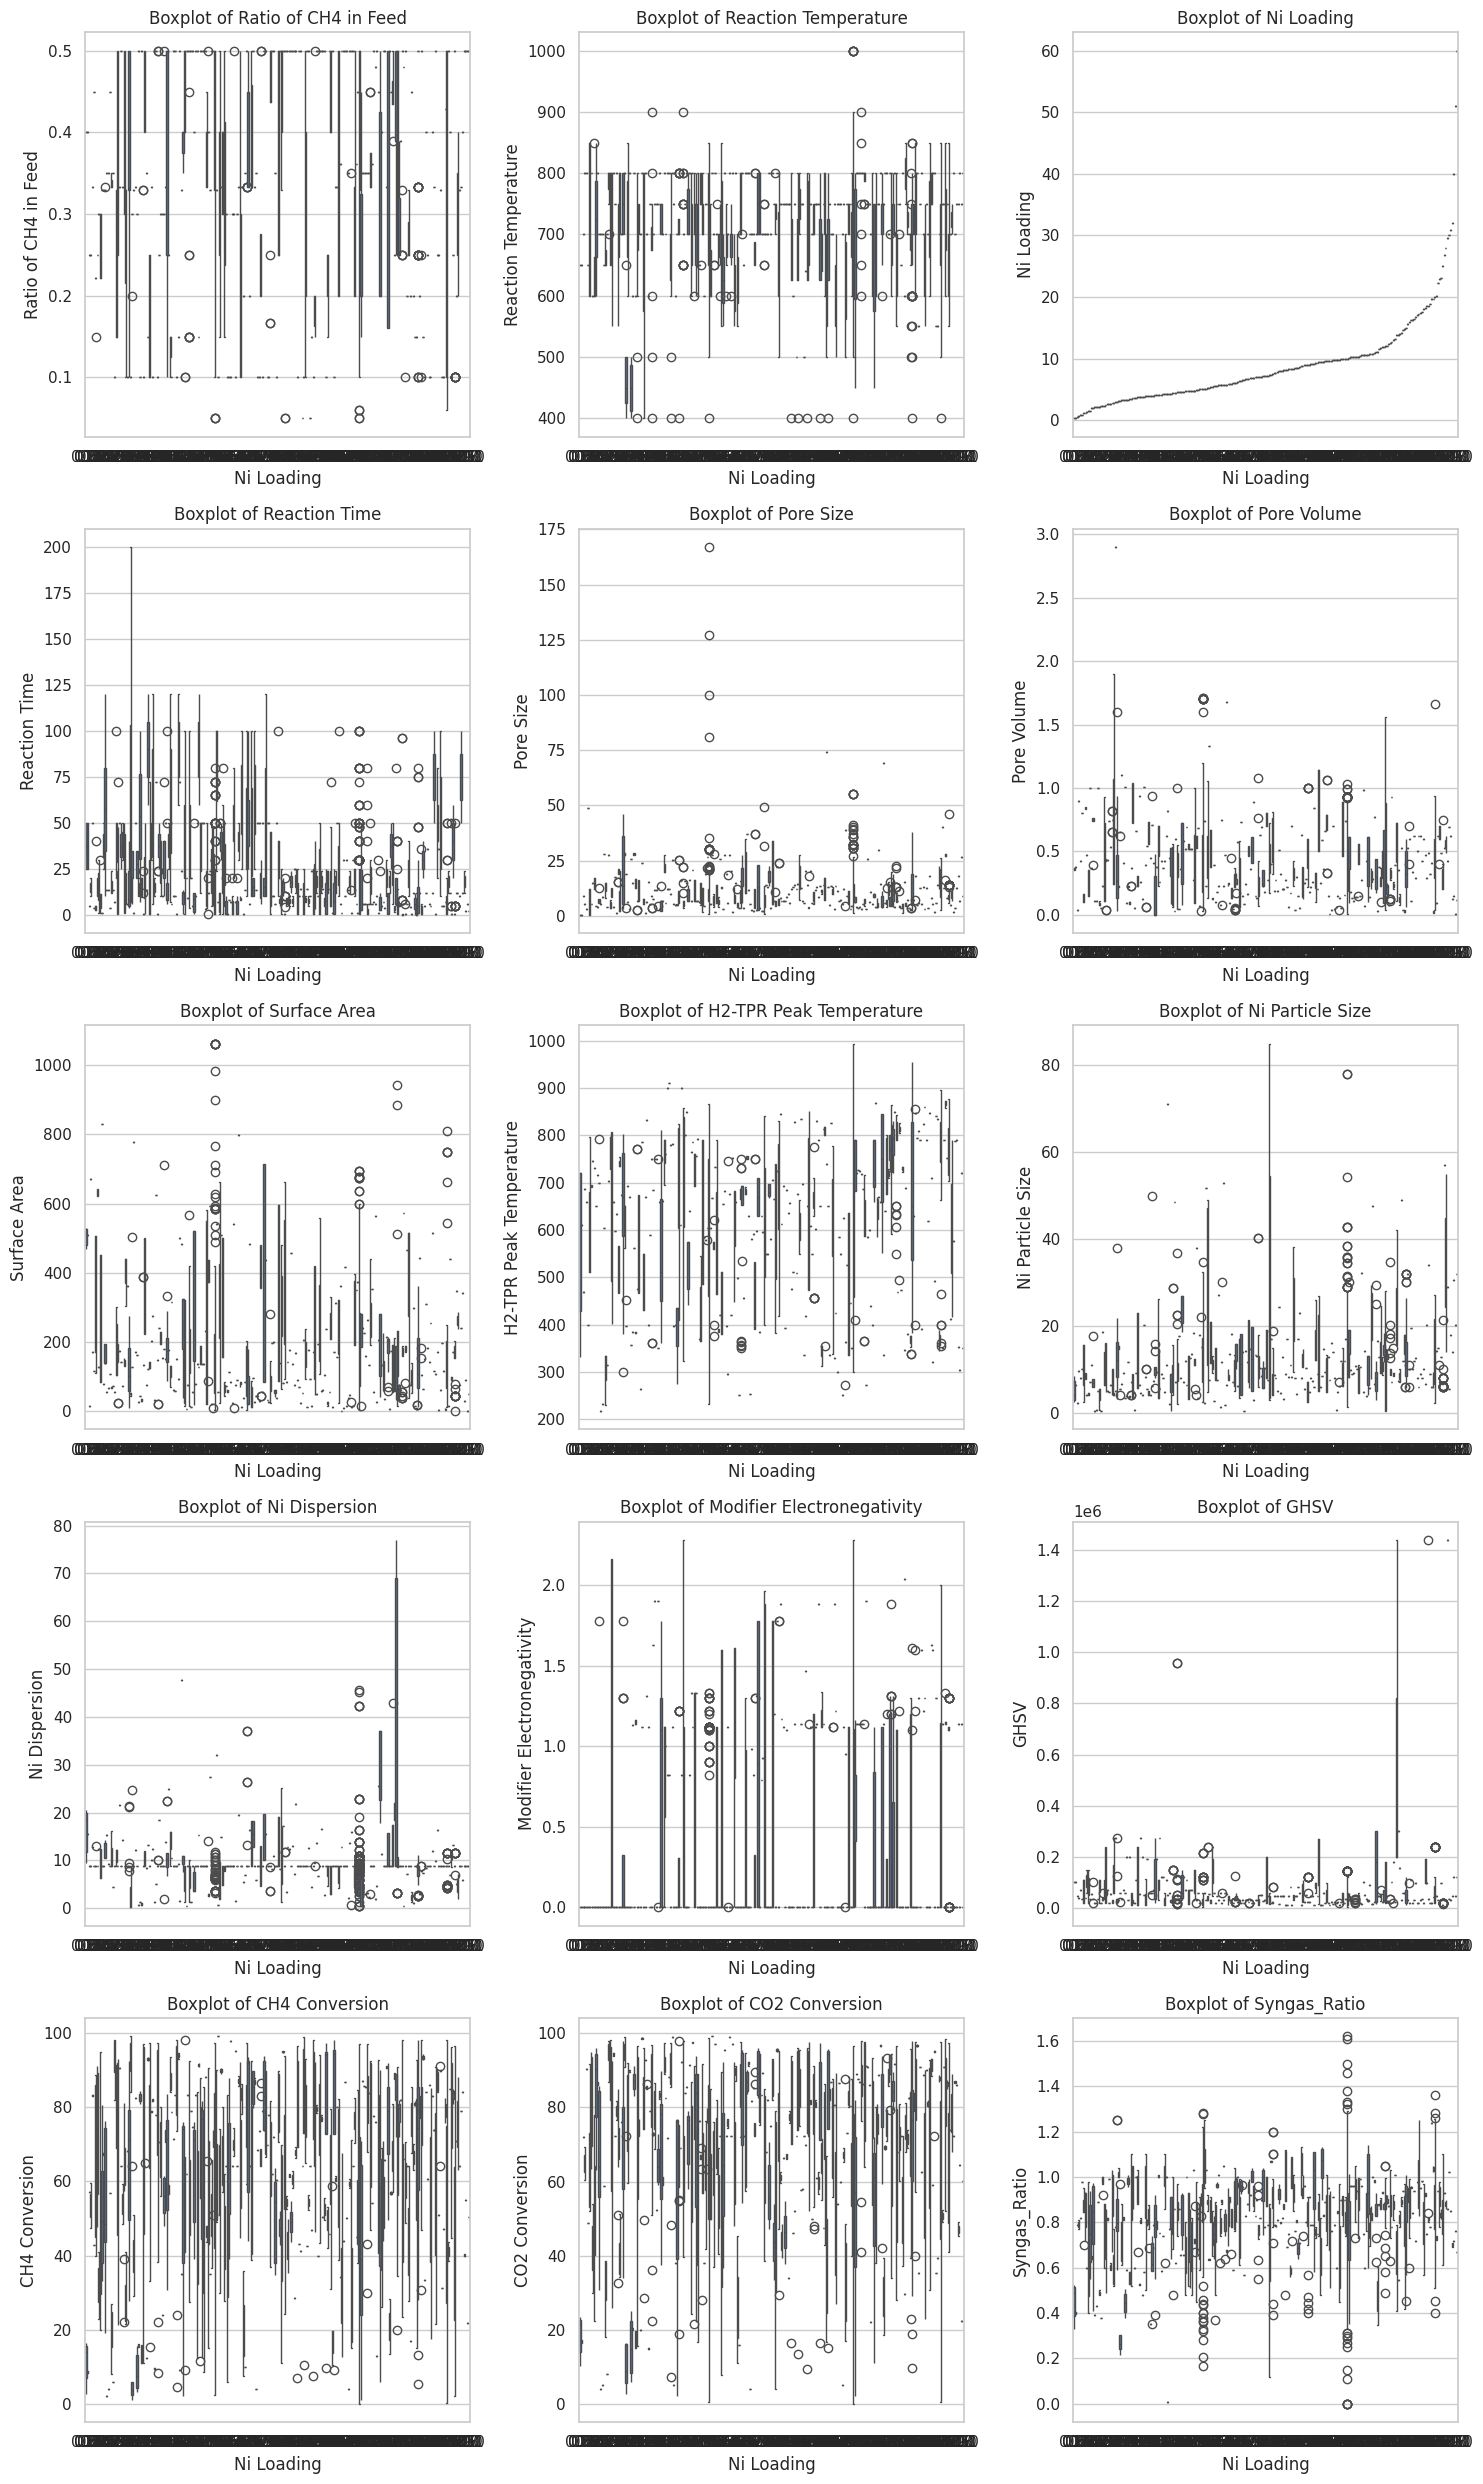

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust the path as needed)
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')  # Replace with your actual file path

# Ensure column names are clean and consistent (remove extra spaces, lowercase)
df.columns = df.columns.str.strip()  # Strip leading/trailing spaces from column names


# Remove the first column (which might not be 'Catalyst')
df = df.iloc[:, 1:]

Ni_Loading_column = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx', usecols=['Ni Loading'])


# Get the list of columns in the dataframe excluding the first column
columns_to_plot = df.columns.tolist()

# Box plots to show the distribution of chemical components by 'Catalyst Preparation Method'
sns.set_theme(style="whitegrid")

# Determine the number of rows and columns for subplots based on the number of columns to plot
n_cols = 3  # You can adjust this depending on how many columns you want per row
n_rows = (len(columns_to_plot) // n_cols) + (1 if len(columns_to_plot) % n_cols != 0 else 0)

# Create subplots with dynamic rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the columns to create box plots
for i, col in enumerate(columns_to_plot):
    if col in df.columns:
        sns.boxplot(data=df, x='Ni Loading', y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('Ni Loading')
        axes[i].set_ylabel(f'{col}')
    else:
        print(f"Warning: '{col}' not found in DataFrame columns")

# Hide any unused axes if there are more subplots than columns to plot
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**Check for categorical variables**

In [9]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

Ratio of CH4 in Feed          float64
Reaction Temperature            int64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                            int64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
dtype: object

Numeric columns: Index(['Ratio of CH4 in Feed', 'Reaction Temperature', 'Ni Loading',
       'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area',
       'H2-TPR Peak Temperature', 'Ni Particle Size', 'Ni Dispersion',
       'Modifier Electronegativity', 'GHSV', 'CH4 Conversion',
       'CO2 Conversion', 'Syngas_Ratio'],
      dtype='object')

Categorical columns: Index([], dtype='object')


**Heatmaps**

Remove categorical variables before plotting heatmaps


Numerical DataFrame (Categorical Variables Removed):
   Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
0                  0.15                   650        10.0            0.5   
1                  0.15                   650        10.0            0.5   
2                  0.15                   650        10.0            0.5   
3                  0.15                   650        10.0            0.5   
4                  0.15                   650        10.0            0.5   

   Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
0        4.7         0.58         476.0                    640.0   
1        4.7         0.58         476.0                    640.0   
2        5.2         0.58         455.0                    457.0   
3        5.2         0.58         455.0                    457.0   
4        4.8         0.82         599.0                    558.0   

   Ni Particle Size  Ni Dispersion  Modifier Electronegativity   GHSV  \
0      

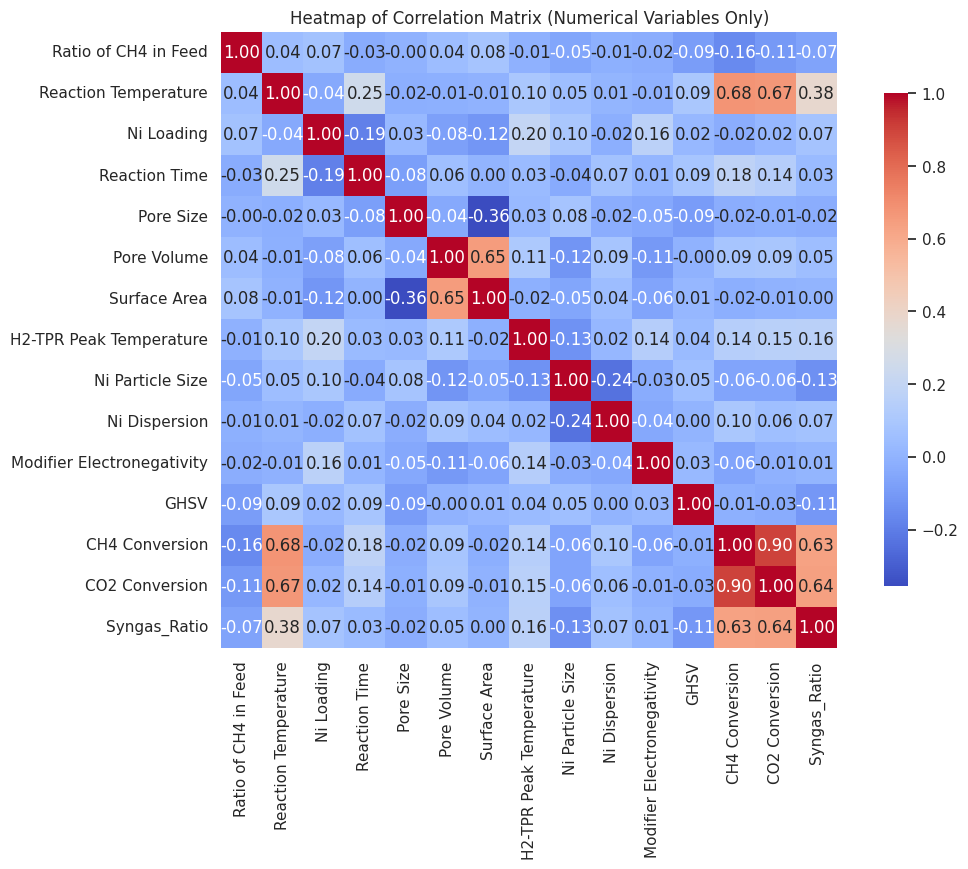

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Remove categorical variables
data_numerical = data.select_dtypes(include=['float64', 'int64'])

# Display the numerical DataFrame
print("\nNumerical DataFrame (Categorical Variables Removed):")
print(data_numerical.head())

# Calculate the correlation matrix
correlation_matrix = data_numerical.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Annotate cells with correlation coefficients
    fmt=".2f",            # Format for the annotation
    cmap='coolwarm',      # Color map for the heatmap
    square=True,          # Make cells square-shaped
    cbar_kws={"shrink": .8}  # Adjust color bar size
)

plt.title('Heatmap of Correlation Matrix (Numerical Variables Only)')
plt.show()

#Feature Engineering

Splitting dataset into features and targets

Targets (y) = Syngas Ratio, CO2 Conversion, CH4 Conversion

Features (x) = Ratio of CH4 in Feed, Reaction Temperature, Ni Loading (catalyst), Reaction Time, Pore Size, Pore Volume, Surface Area, H2-TPR Peak Temperature, Ni Particle Size, Ni Dispersion, Modifier Electronegativity, GHSV



In [11]:
import pandas as pd

# Load your data (replace 'your_data.xlsx' with your actual file path)
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Define target variables
target_variables = ['Syngas_Ratio', 'CH4 Conversion', 'CO2 Conversion']

# Split the data into features (X) and target variables (y)
X = df.drop(columns=target_variables)

# Create separate target variables (y) for each target
y_syngas_ratio = df['Syngas_Ratio']
y_ch4_conversion = df['CH4 Conversion']
y_co2_conversion = df['CO2 Conversion']

# Print out the features and target variables for verification
print("Features (X):")
print(X.head())

print("Target Variable (Syngas_Ratio):")
print(y_syngas_ratio.head())

print("Target Variable (CH4_Conversion):")
print(y_ch4_conversion.head())

print("Target Variable (CO2_Conversion):")
print(y_co2_conversion.head())


Features (X):
             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            8.9   
1                    640

**Histograms of target vs features**

Histogram for CH4 Conversion vs Reaction Temperature

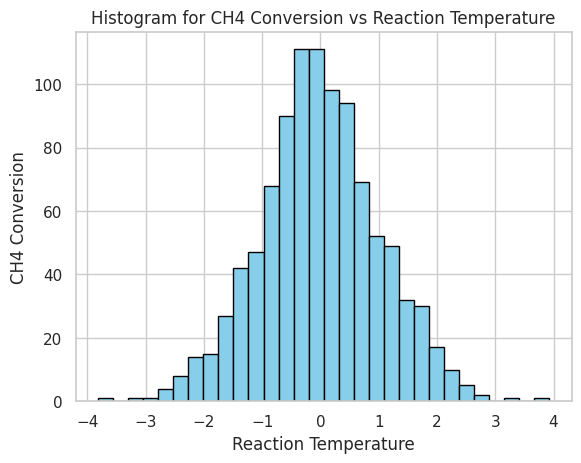

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Reaction Temperature')
plt.ylabel('CH4 Conversion')
plt.title('Histogram for CH4 Conversion vs Reaction Temperature')

# Display the plot
plt.show()

Histogram for CH4 Conversion vs Ni Loading

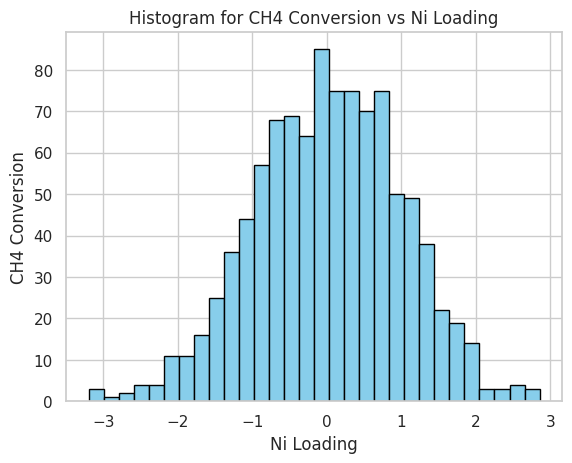

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Ni Loading')
plt.ylabel('CH4 Conversion')
plt.title('Histogram for CH4 Conversion vs Ni Loading')

# Display the plot
plt.show()

Histogram for CH4 Conversion vs Ratio of CH4 in Feed

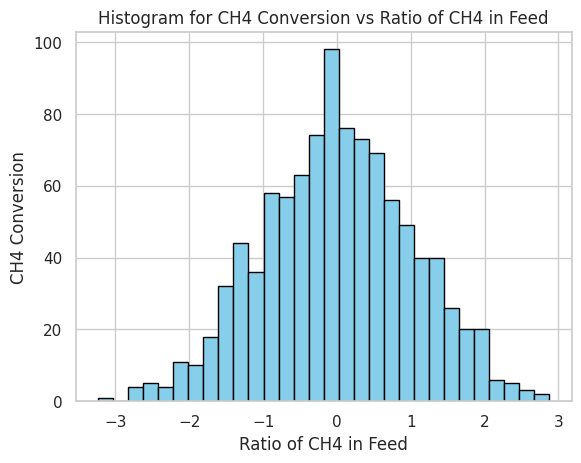

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Ratio of CH4 in Feed')
plt.ylabel('CH4 Conversion')
plt.title('Histogram for CH4 Conversion vs Ratio of CH4 in Feed')

# Display the plot
plt.show()

Histogram for CO2 Conversion vs Ni Loading

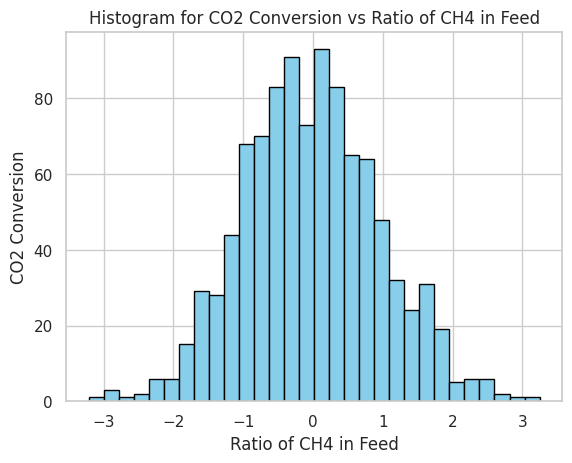

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Ratio of CH4 in Feed')
plt.ylabel('CO2 Conversion')
plt.title('Histogram for CO2 Conversion vs Ratio of CH4 in Feed')

# Display the plot
plt.show()

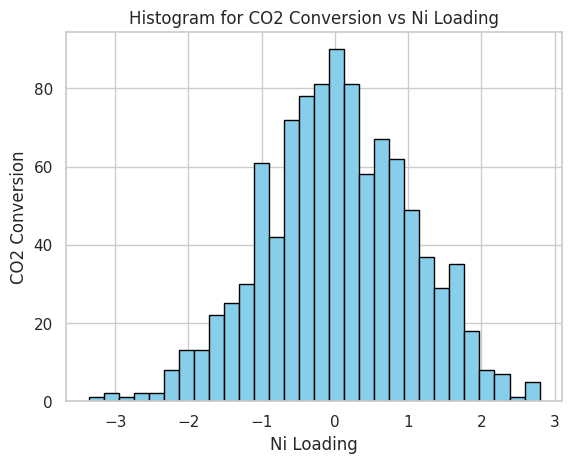

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Ni Loading')
plt.ylabel('CO2 Conversion')
plt.title('Histogram for CO2 Conversion vs Ni Loading')

# Display the plot
plt.show()

Histogram for CO2 Conversion vs Reaction Temperature

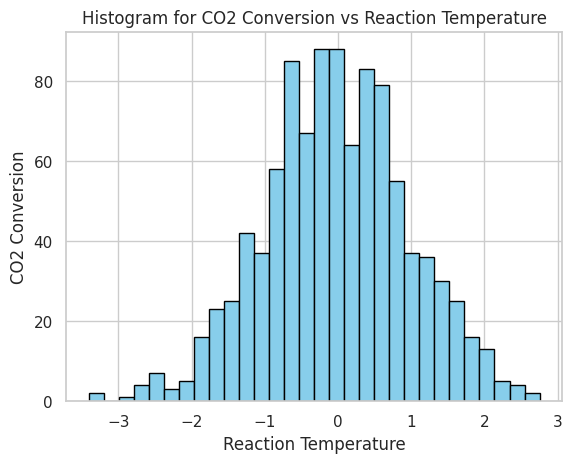

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Reaction Temperature')  # Combine labels into a single string if needed
plt.ylabel('CO2 Conversion')
plt.title('Histogram for CO2 Conversion vs Reaction Temperature')

# Display the plot
plt.show()

Histogram for 'Syngas_Ratio vs 'Reaction Temperature'



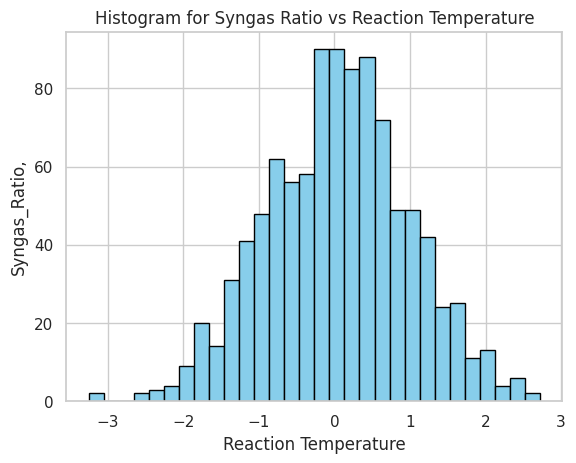

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Reaction Temperature')  # Combine labels into a single string if needed
plt.ylabel('Syngas_Ratio,')
plt.title('Histogram for Syngas Ratio vs Reaction Temperature')

# Display the plot
plt.show()

Histogram for 'Syngas_Ratio' vs 'Ratio of CH4 in Feed'

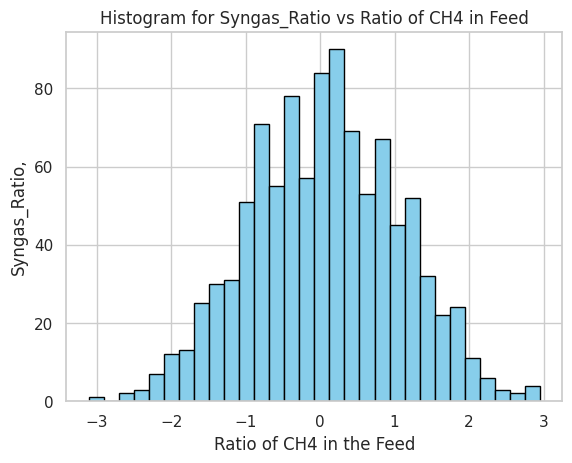

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# If you want to plot data from your DataFrame, replace 'data' with the appropriate column
# Example: data = df['YourColumnName'].values

# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Ratio of CH4 in the Feed')
plt.ylabel('Syngas_Ratio,')
plt.title('Histogram for Syngas_Ratio vs Ratio of CH4 in Feed')

# Display the plot
plt.show()

Histogram for Syngas_Ratio vs Ni Loading



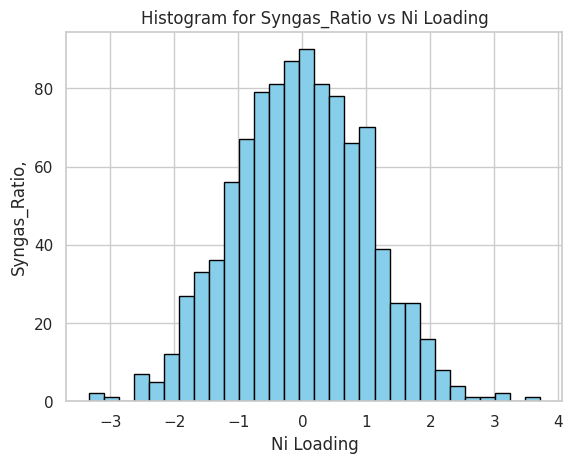

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for the histogram (if intended)
data = np.random.randn(1000)

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')


# Plotting a basic histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Ni Loading')  # Combine labels into a single string if needed
plt.ylabel('Syngas_Ratio,')
plt.title('Histogram for Syngas_Ratio vs Ni Loading')

# Display the plot
plt.show()

#Selection of appropriate and suitable Machine Learning Model

**Training of datasets and evaluation of models**

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Remove the first column (only the first column)
df = df.drop(df.columns[0], axis=1)

# List of feature columns
features = ['Ni Loading', 'Surface Area', 'GHSV', 'Reaction Temperature', 'Ratio of CH4 in Feed',
            'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature', 'Ni Particle Size',
            'Ni Dispersion', 'Modifier Electronegativity']

# Define multiple target variables
target_variables = ['Syngas_Ratio', 'CO2 Conversion', 'CH4 Conversion']

# Fill NaN values with the mean of each column (for both features and target variables)
df[features + target_variables] = df[features + target_variables].fillna(df.mean())

# Dictionary to hold the performance results
results = {}

# Loop over each target variable to train and evaluate models for each
for target_variable in target_variables:
    # Prepare the feature set (X) and current target variable (y)
    X = df[features]
    y = df[target_variable]

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the models to evaluate
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(),
        "Support Vector Regressor": SVR(),
        "K-Neighbors Regressor": KNeighborsRegressor(),
        "Decision Tree Regressor": DecisionTreeRegressor()
    }

    # Evaluate each model
    model_results = {}
    for name, model in models.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        predictions = model.predict(X_test)

        # Calculate Mean Absolute Error (MAE) and R² for model evaluation
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store the result in the dictionary
        model_results[name] = {'MAE': mae, 'R²': r2}

        # Print the result for this model
        print(f"{target_variable} - {name}: MAE = {mae:.4f}, R² = {r2:.4f}")

    # Store the results for each target variable
    results[target_variable] = model_results

    # Identify the best model for the current target variable (the model with the lowest MAE and highest R²)
    best_model_name = min(model_results, key=lambda x: model_results[x]['MAE'])
    best_model_mae = model_results[best_model_name]['MAE']
    best_model_r2 = model_results[best_model_name]['R²']

    # Output the best model and its performance for the current target variable
    print(f"\nBest Model for {target_variable}: {best_model_name} with MAE = {best_model_mae:.4f} and R² = {best_model_r2:.4f}\n")


Syngas_Ratio - Linear Regression: MAE = 0.1107, R² = 0.2209
Syngas_Ratio - Random Forest: MAE = 0.0518, R² = 0.7885
Syngas_Ratio - Support Vector Regressor: MAE = 0.1192, R² = 0.0572
Syngas_Ratio - K-Neighbors Regressor: MAE = 0.0708, R² = 0.5881
Syngas_Ratio - Decision Tree Regressor: MAE = 0.0617, R² = 0.6792

Best Model for Syngas_Ratio: Random Forest with MAE = 0.0518 and R² = 0.7885

CO2 Conversion - Linear Regression: MAE = 11.6260, R² = 0.5668
CO2 Conversion - Random Forest: MAE = 6.1047, R² = 0.8238
CO2 Conversion - Support Vector Regressor: MAE = 17.5049, R² = -0.0088
CO2 Conversion - K-Neighbors Regressor: MAE = 8.6729, R² = 0.6530
CO2 Conversion - Decision Tree Regressor: MAE = 6.9543, R² = 0.6868

Best Model for CO2 Conversion: Random Forest with MAE = 6.1047 and R² = 0.8238

CH4 Conversion - Linear Regression: MAE = 12.9469, R² = 0.5877
CH4 Conversion - Random Forest: MAE = 6.3044, R² = 0.8544
CH4 Conversion - Support Vector Regressor: MAE = 20.3518, R² = -0.0021
CH4 Conve

**Cross Validation**

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Remove the first column (only the first column)
df = df.drop(df.columns[0], axis=1)

# List of feature columns
features = ['Ni Loading', 'Surface Area', 'GHSV', 'Reaction Temperature', 'Ratio of CH4 in Feed',
            'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature', 'Ni Particle Size',
            'Ni Dispersion', 'Modifier Electronegativity']

# Define multiple target variables
target_variables = ['Syngas_Ratio', 'CO2 Conversion', 'CH4 Conversion']

# Fill NaN values with the mean of each column (for both features and target variables)
df[features + target_variables] = df[features + target_variables].fillna(df.mean())

# Dictionary to hold the performance results
results = {}

# Loop over each target variable to train and evaluate models for each
for target_variable in target_variables:
    # Prepare the feature set (X) and current target variable (y)
    X = df[features]
    y = df[target_variable]

    # Define the models to evaluate
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(),
        "Support Vector Regressor": SVR(),
        "K-Neighbors Regressor": KNeighborsRegressor(),
        "Decision Tree Regressor": DecisionTreeRegressor()
    }

    # Initialize a dictionary to store the cross-validation results
    model_results = {}

    for name, model in models.items():
        # Perform cross-validation (using 5-fold cross-validation)

        # MAE using negative mean absolute error for cross-validation (because sklearn's cross_val_score returns the negative of the MAE)
        mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

        # R² scores (using R² for cross-validation)
        r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

        # Calculate the average MAE and R² scores
        mean_mae = -mae_scores.mean()  # Convert back to positive MAE
        mean_r2 = r2_scores.mean()

        # Store the results in the dictionary
        model_results[name] = {'MAE': mean_mae, 'R²': mean_r2}

        # Print the result for this model
        print(f"{target_variable} - {name}: Mean MAE = {mean_mae:.4f}, Mean R² = {mean_r2:.4f}")

    # Store the results for each target variable
    results[target_variable] = model_results

    # Identify the best model for the current target variable (the model with the lowest MAE and highest R²)
    best_model_name = min(model_results, key=lambda x: model_results[x]['MAE'])
    best_model_mae = model_results[best_model_name]['MAE']
    best_model_r2 = model_results[best_model_name]['R²']

    # Output the best model and its performance for the current target variable
    print(f"\nBest Model for {target_variable}: {best_model_name} with Mean MAE = {best_model_mae:.4f} and Mean R² = {best_model_r2:.4f}\n")


Syngas_Ratio - Linear Regression: Mean MAE = 0.1273, Mean R² = 0.1228
Syngas_Ratio - Random Forest: Mean MAE = 0.1201, Mean R² = 0.1859
Syngas_Ratio - Support Vector Regressor: Mean MAE = 0.1336, Mean R² = -0.0137
Syngas_Ratio - K-Neighbors Regressor: Mean MAE = 0.1301, Mean R² = 0.0506
Syngas_Ratio - Decision Tree Regressor: Mean MAE = 0.1637, Mean R² = -0.5498

Best Model for Syngas_Ratio: Random Forest with Mean MAE = 0.1201 and Mean R² = 0.1859

CO2 Conversion - Linear Regression: Mean MAE = 12.9164, Mean R² = 0.4477
CO2 Conversion - Random Forest: Mean MAE = 12.4889, Mean R² = 0.4587
CO2 Conversion - Support Vector Regressor: Mean MAE = 18.0202, Mean R² = -0.0476
CO2 Conversion - K-Neighbors Regressor: Mean MAE = 15.2964, Mean R² = 0.1925
CO2 Conversion - Decision Tree Regressor: Mean MAE = 16.2229, Mean R² = -0.0124

Best Model for CO2 Conversion: Random Forest with Mean MAE = 12.4889 and Mean R² = 0.4587

CH4 Conversion - Linear Regression: Mean MAE = 14.0639, Mean R² = 0.4899
C

Display a plot of training and testing
𝑅^2 scores for different models

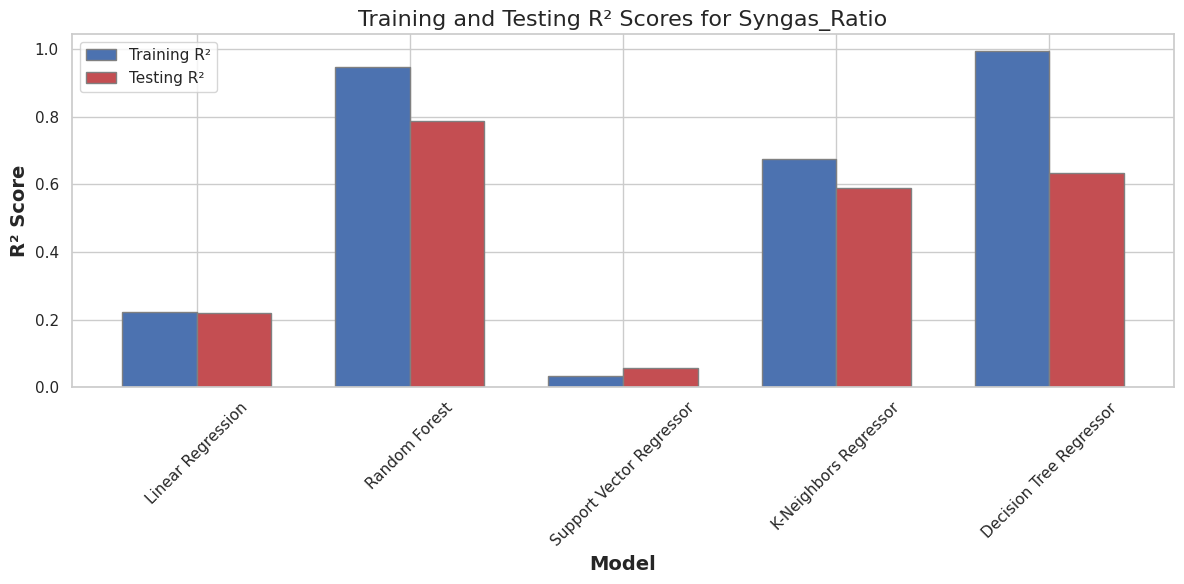

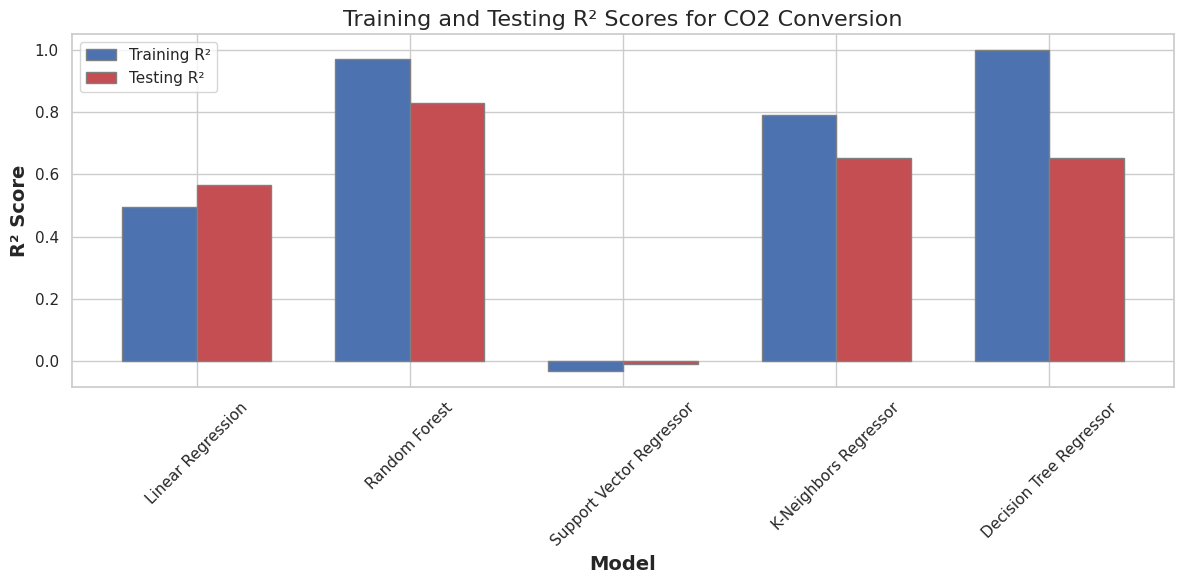

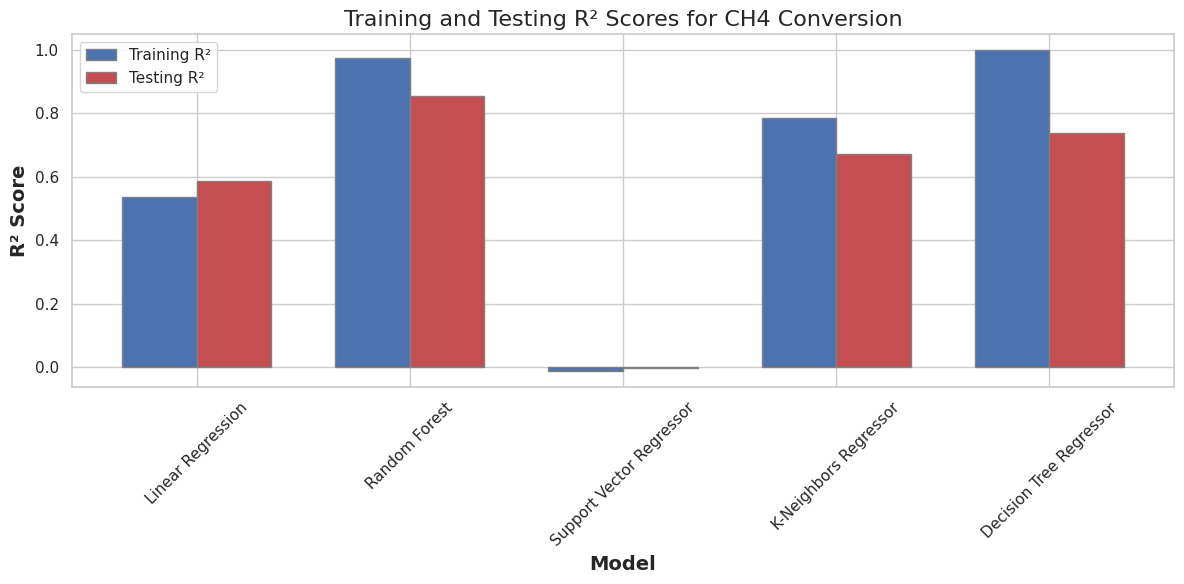

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')

# Remove the first column (usually an index or irrelevant column)
df = df.drop(df.columns[0], axis=1)

# List of feature columns
features = ['Ni Loading', 'Surface Area', 'GHSV', 'Reaction Temperature', 'Ratio of CH4 in Feed',
            'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature', 'Ni Particle Size',
            'Ni Dispersion', 'Modifier Electronegativity']

# Define multiple target variables
target_variables = ['Syngas_Ratio', 'CO2 Conversion', 'CH4 Conversion']

# Fill NaN values with the mean of each column (features + target columns)
df[features + target_variables] = df[features + target_variables].fillna(df.mean())

# Split the data into features (X)
X = df[features]

# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

# Dictionaries to hold the R^2 scores for each target variable
train_r2_scores = {target: {} for target in target_variables}
test_r2_scores = {target: {} for target in target_variables}

# Train and evaluate each model for each target variable
for target_variable in target_variables:
    y = df[target_variable]  # Select the target variable

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, model in models.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Calculate R^2 score for training and testing data
        train_r2 = model.score(X_train, y_train)
        test_r2 = model.score(X_test, y_test)

        # Store the R^2 scores for each target variable
        train_r2_scores[target_variable][name] = train_r2
        test_r2_scores[target_variable][name] = test_r2

# Plotting the R^2 scores for training and testing across different target variables and models
for target_variable in target_variables:
    labels = list(models.keys())  # Model names

    # Bar width
    bar_width = 0.35

    # X axis positions for the bars
    r1 = np.arange(len(labels))  # Position for training bars
    r2 = [x + bar_width for x in r1]  # Position for testing bars

    # Create the plot for each target variable
    plt.figure(figsize=(12, 6))

    # Plot training R^2 scores
    plt.bar(r1, train_r2_scores[target_variable].values(), color='b', width=bar_width, edgecolor='grey', label='Training R²')

    # Plot testing R^2 scores
    plt.bar(r2, test_r2_scores[target_variable].values(), color='r', width=bar_width, edgecolor='grey', label='Testing R²')

    # Add labels and title
    plt.xlabel('Model', fontweight='bold', fontsize=14)
    plt.ylabel('R² Score', fontweight='bold', fontsize=14)
    plt.title(f'Training and Testing R² Scores for {target_variable}', fontsize=16)
    plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels, rotation=45)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


#Hyperparameter tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Target Variable: Syngas_Ratio
Best Parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': None, 'bootstrap': True}
Training R^2: 0.8971
Testing R^2: 0.7288
Mean Absolute Error (MAE): 0.0641
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Target Variable: CO2 Conversion
Best Parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': None, 'bootstrap': True}
Training R^2: 1.0000
Testing R^2: 1.0000
Mean Absolute Error (MAE): 0.0486
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Target Variable: CH4 Conversion
Best Parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': None, 'bootstrap': True}
Training R^2: 1.0000
Testing R^2: 1.0000
Mean Absolute Error (MAE): 0.0470


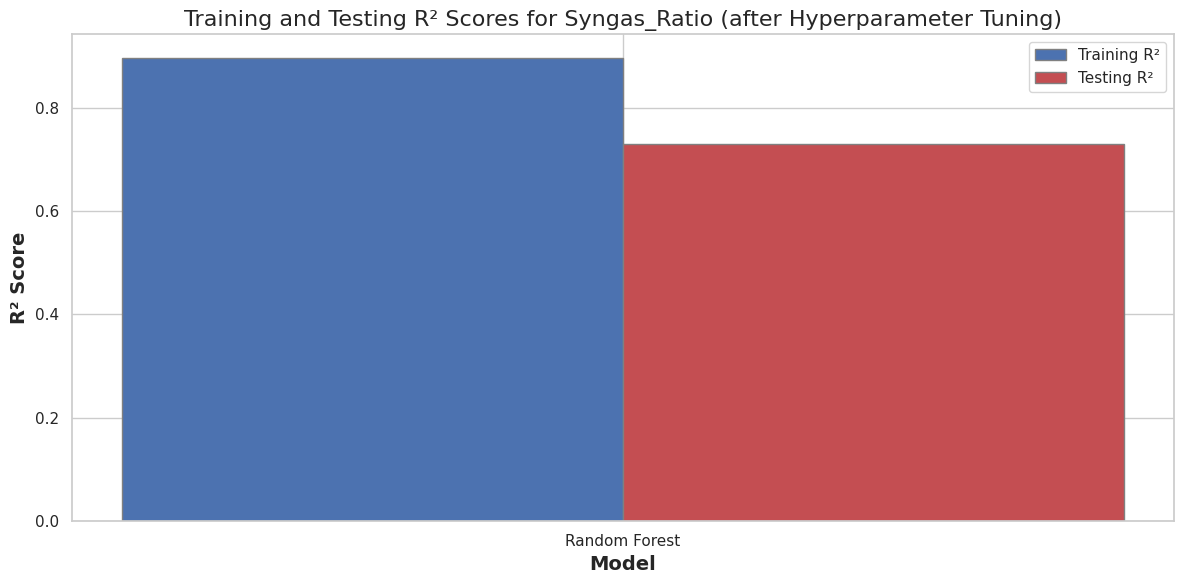

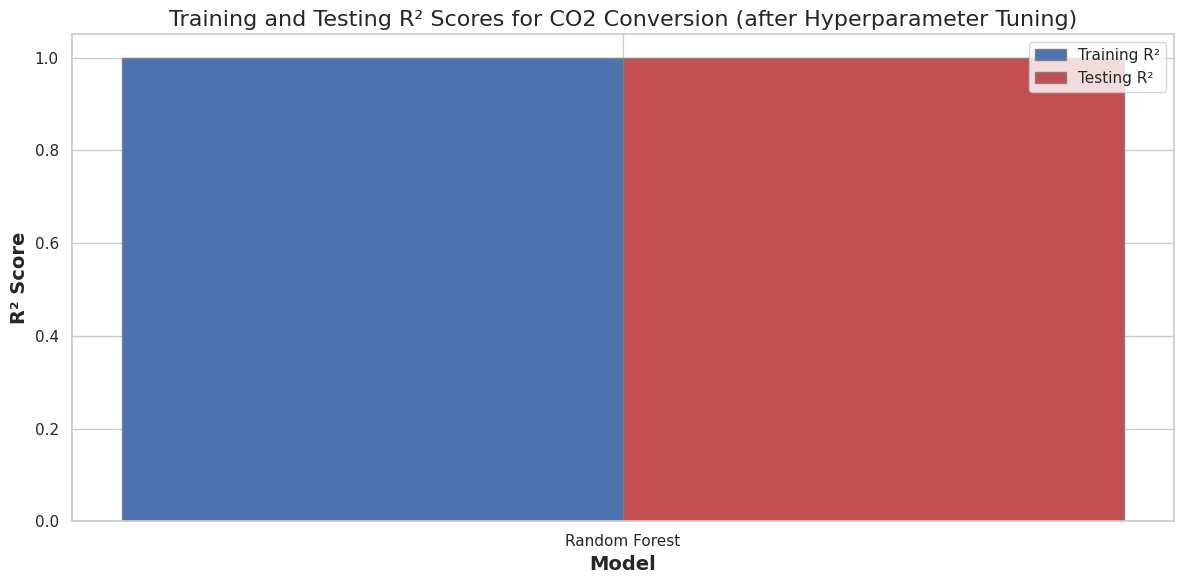

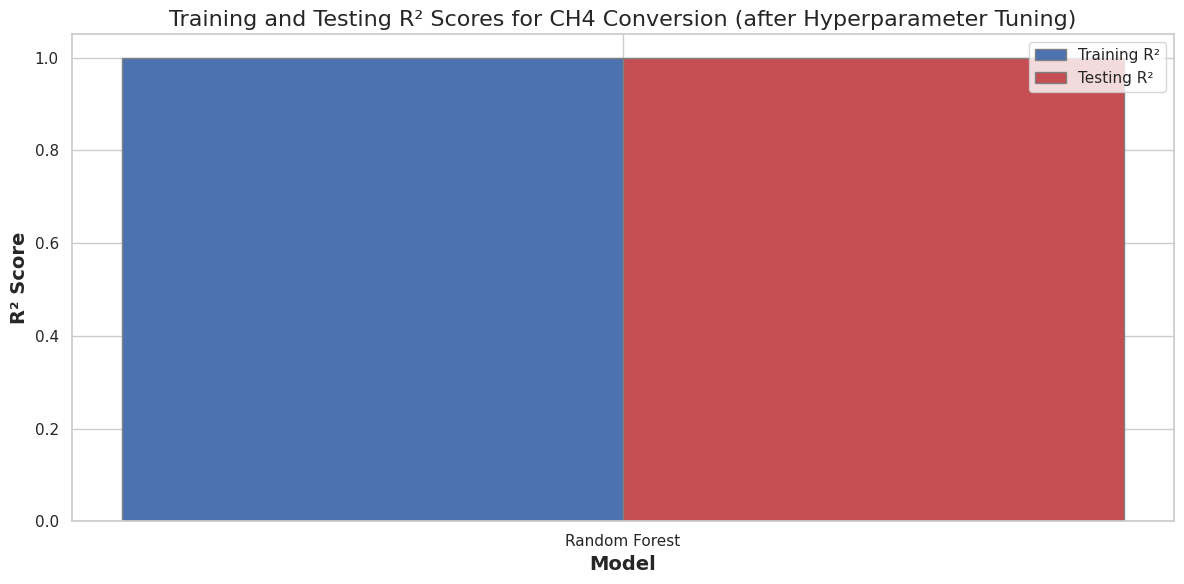

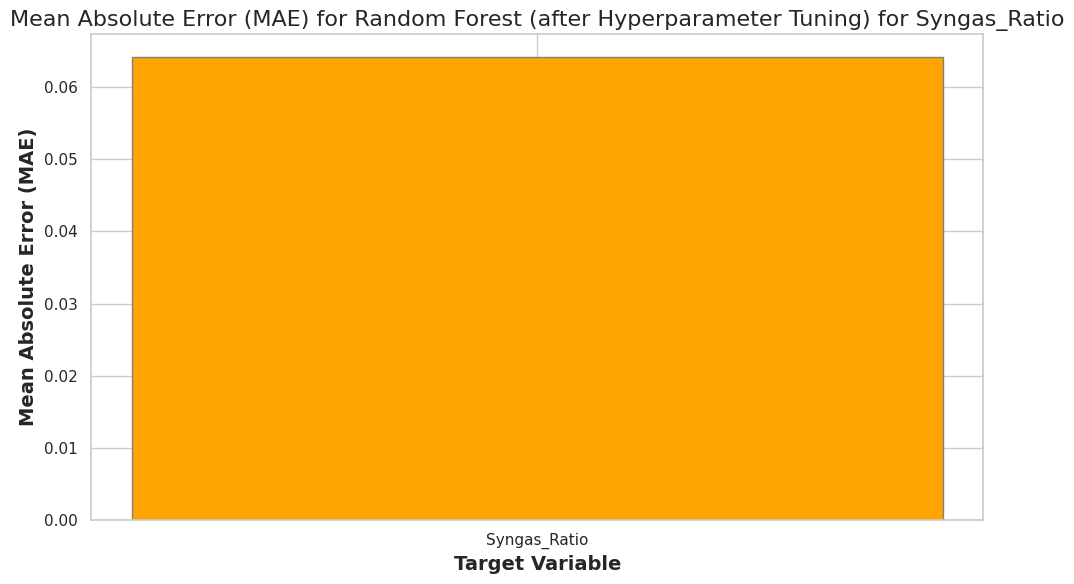

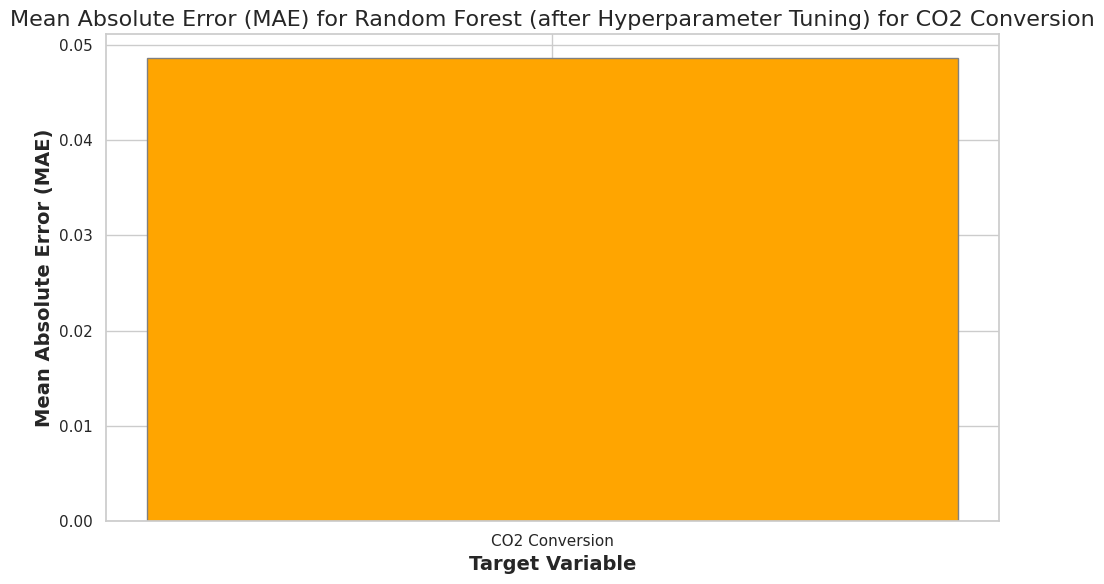

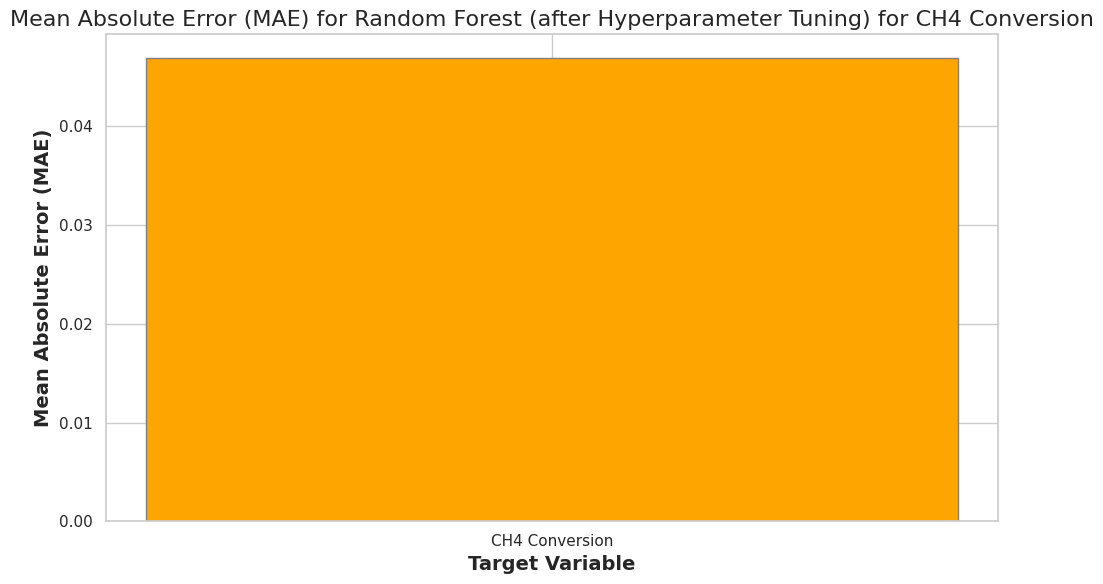

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.utils import shuffle

# Load your dataset
df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')  # Adjust the file path as necessary

# Remove the first column (usually an index or irrelevant column)
df = df.drop(df.columns[0], axis=1)

# List of feature columns
features = ['Ni Loading', 'Surface Area', 'GHSV', 'CO2 Conversion', 'CH4 Conversion', 'Reaction Temperature',
            'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature', 'Ni Particle Size',
            'Ni Dispersion', 'Modifier Electronegativity']

# Define multiple target variables
target_variables = ['Syngas_Ratio', 'CO2 Conversion', 'CH4 Conversion']

# Shuffle the data to ensure no order bias
df = shuffle(df, random_state=42)

# Prepare the feature set (X)
X = df[features]

# Define the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'bootstrap': [True, False]
}

# Dictionaries to hold the R^2 scores and MAE for each target variable
train_r2_scores = {target: [] for target in target_variables}
test_r2_scores = {target: [] for target in target_variables}
mae_scores = {target: [] for target in target_variables}

# Train and evaluate for each target variable
for target_variable in target_variables:
    y = df[target_variable]  # Select the target variable

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Set up RandomizedSearchCV with 5-fold cross-validation
    random_search = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist,
                                       n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

    # Perform the random search
    random_search.fit(X_train, y_train)

    # Get the best model from the random search
    best_model = random_search.best_estimator_

    # Make predictions using the best model
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Calculate performance metrics for Random Forest
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    # Store the evaluation results
    train_r2_scores[target_variable] = train_r2
    test_r2_scores[target_variable] = test_r2
    mae_scores[target_variable] = mae

    # Print the evaluation results for Random Forest
    print(f"\nTarget Variable: {target_variable}")
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Training R^2: {train_r2:.4f}")
    print(f"Testing R^2: {test_r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualization: Plotting R^2 Scores for Training and Testing
for target_variable in target_variables:
    labels = ['Random Forest']  # Model names

    # Bar width
    bar_width = 0.35  # Width of bars

    # X axis positions for the bars
    r1 = np.arange(len(labels))
    r2 = [x + bar_width for x in r1]

    # Create the plot for each target variable
    plt.figure(figsize=(12, 6))

    # Plot training R^2 scores
    plt.bar(r1, [train_r2_scores[target_variable]], color='b', width=bar_width, edgecolor='grey', label='Training R²')

    # Plot testing R^2 scores
    plt.bar(r2, [test_r2_scores[target_variable]], color='r', width=bar_width, edgecolor='grey', label='Testing R²')

    # Add labels and title
    plt.xlabel('Model', fontweight='bold', fontsize=14)
    plt.ylabel('R² Score', fontweight='bold', fontsize=14)
    plt.title(f'Training and Testing R² Scores for {target_variable} (after Hyperparameter Tuning)', fontsize=16)
    plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

# Visualization: Plotting Mean Absolute Error (MAE)
for target_variable in target_variables:
    plt.figure(figsize=(10, 6))

    # Plot MAE for Random Forest
    plt.bar([target_variable], [mae_scores[target_variable]], color='orange', edgecolor='grey')

    # Add labels and title for MAE
    plt.xlabel('Target Variable', fontweight='bold', fontsize=14)
    plt.ylabel('Mean Absolute Error (MAE)', fontweight='bold', fontsize=14)
    plt.title(f'Mean Absolute Error (MAE) for Random Forest (after Hyperparameter Tuning) for {target_variable}', fontsize=16)

    # Display the plot
    plt.tight_layout()
    plt.show()


#Feature importance analysis with SHAP
Here, there is also the best model estimator.

The procedure is as follows:
- Load your dataset
- Remove the irrelevant columns
- Define the features and target variables
- Handle missing values replacing with the mean of each column (if any)
- Key in the best hyperparameters
- Evaluate the best model
- SHAP analysis
- Display SHAP analysis plot




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': None, 'bootstrap': True}
Best Model: RandomForestRegressor(min_samples_leaf=3, min_samples_split=6, random_state=42)
Mean Absolute Error on Test Set: 0.05807557174797991


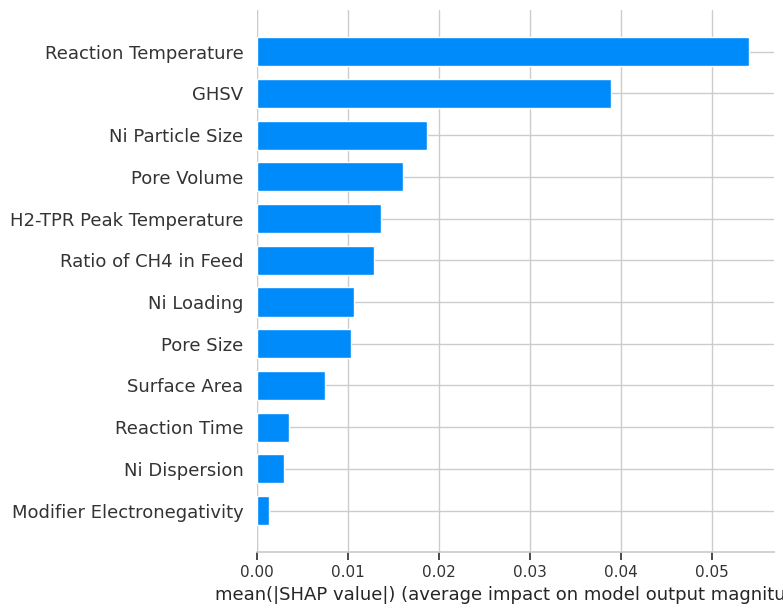

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import shap

df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')  # Adjust the file path as necessary

df = df.drop(df.columns[0], axis=1)

features = ['Ni Loading', 'Surface Area', 'GHSV', 'Ratio of CH4 in Feed', 'Reaction Temperature',
            'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature', 'Ni Particle Size',
            'Ni Dispersion', 'Modifier Electronegativity']

target_variables = ['Syngas_Ratio', 'CO2 Conversion', 'CH4 Conversion']

X = df[features]

X = X.fillna(X.mean())

for target in target_variables:
    df[target] = df[target].fillna(df[target].mean())  # Replace missing target values with mean

# Prepare the target variable (y) for the first target (Syngas_Ratio)
y = df[target_variables[0]]  # You can choose one of the target variables, e.g., 'Syngas_Ratio'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Print the best hyperparameters
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Model: {best_model}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

# SHAP analysis
# Use the TreeExplainer for the best model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

# Visualize feature importance with SHAP summary plot
# We do not need to index `shap_values[0]`, just pass the shap_values directly
shap.summary_plot(shap_values, X_train, plot_type="bar")




The most important feature here is the reaction temperature.

#Interpretable Analysis

Using partial dependence plots (PDP) such as one-way variable and two-way PDP

- One-way partial dependence plots
- Two-way partial dependence plots



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Catalyst                    1714 non-null   object 
 1   Ratio of CH4 in Feed        1714 non-null   float64
 2   Reaction Temperature        1714 non-null   int64  
 3   Ni Loading                  1714 non-null   float64
 4   Reaction Time               1714 non-null   float64
 5   Pore Size                   1714 non-null   float64
 6   Pore Volume                 1714 non-null   float64
 7   Surface Area                1714 non-null   float64
 8   H2-TPR Peak Temperature     1714 non-null   float64
 9   Ni Particle Size            1714 non-null   float64
 10  Ni Dispersion               1714 non-null   float64
 11  Modifier Electronegativity  1714 non-null   float64
 12  GHSV                        1714 non-null   int64  
 13  CH4 Conversion              1714 

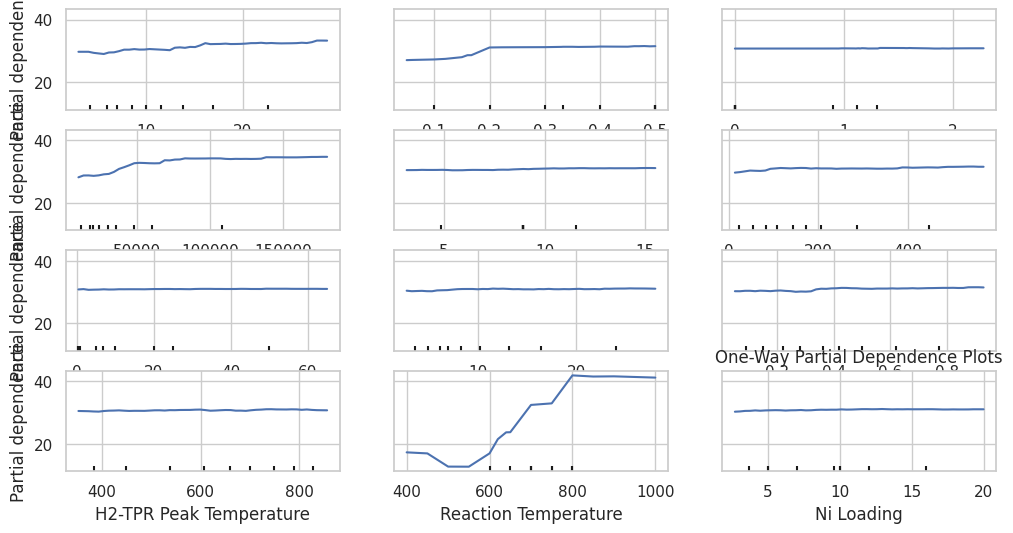

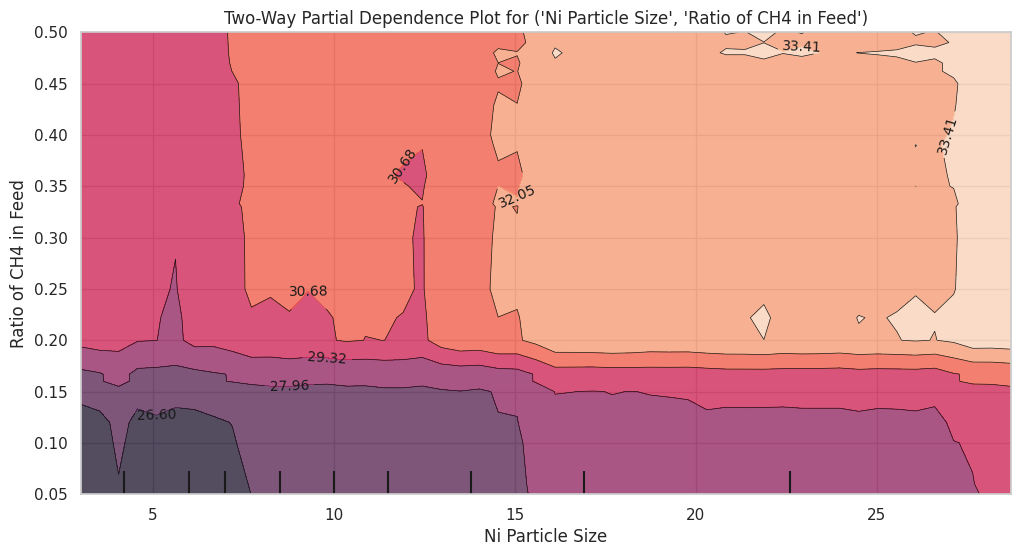

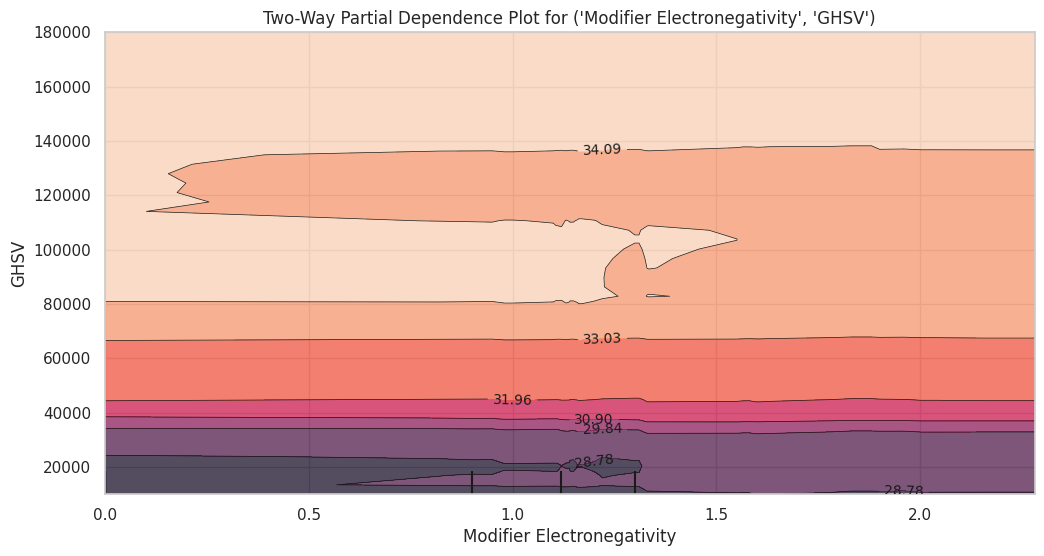

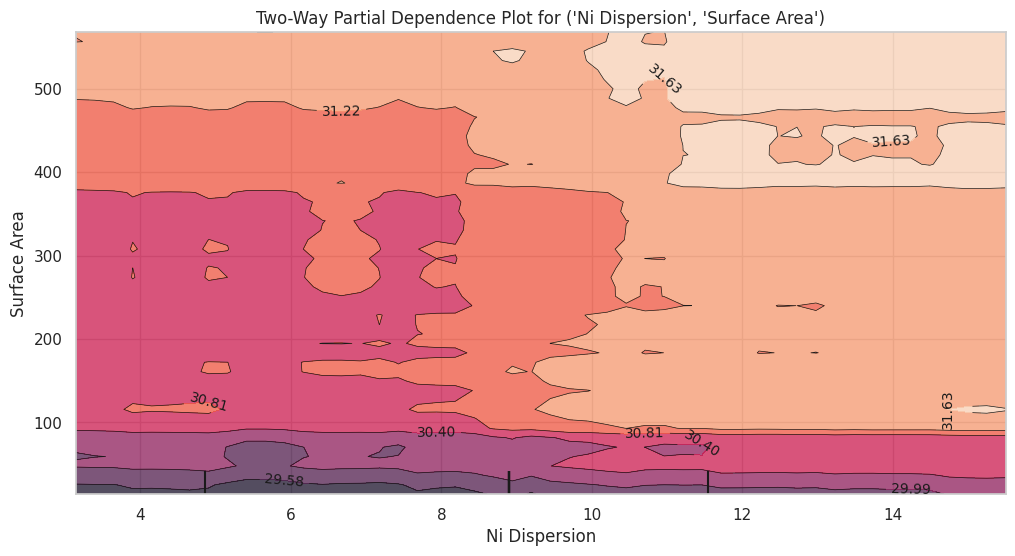

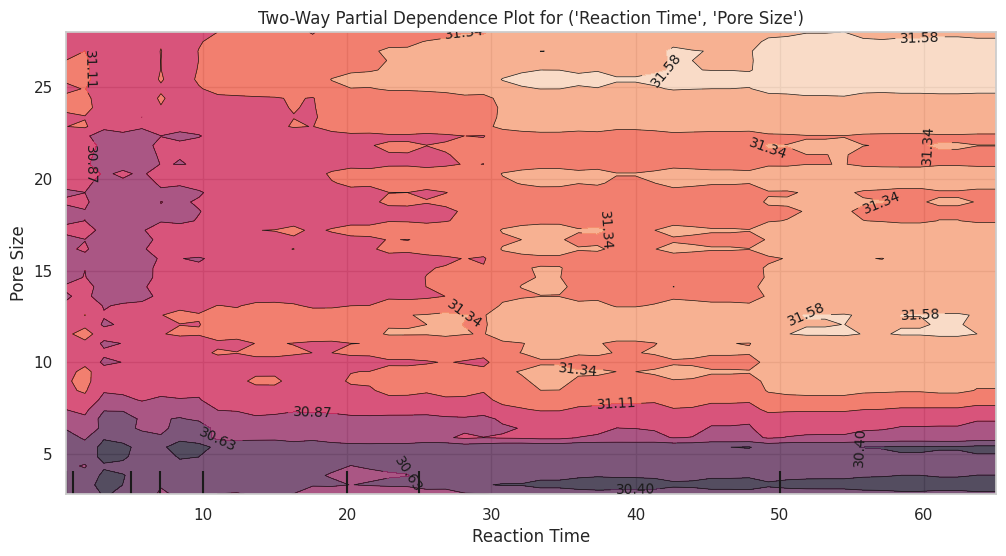

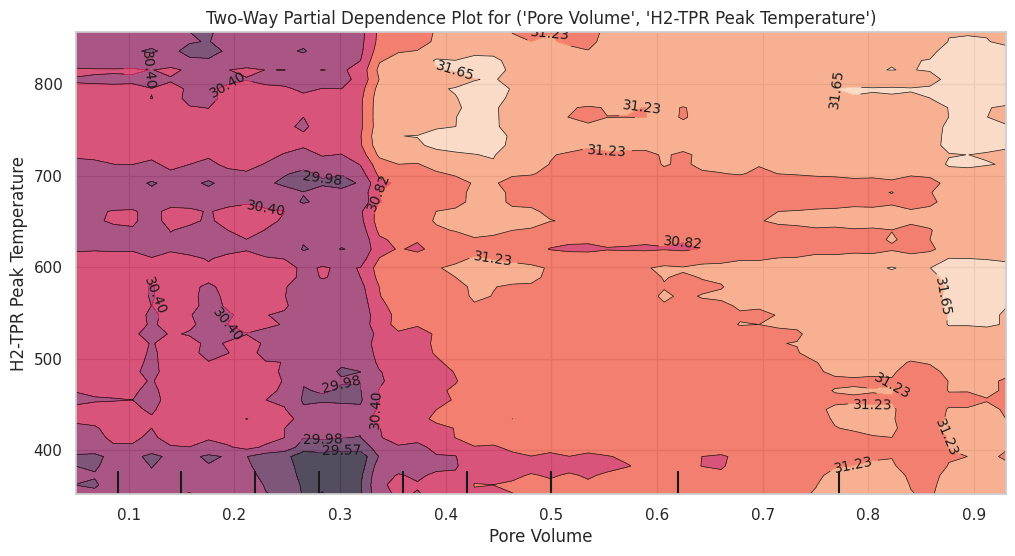

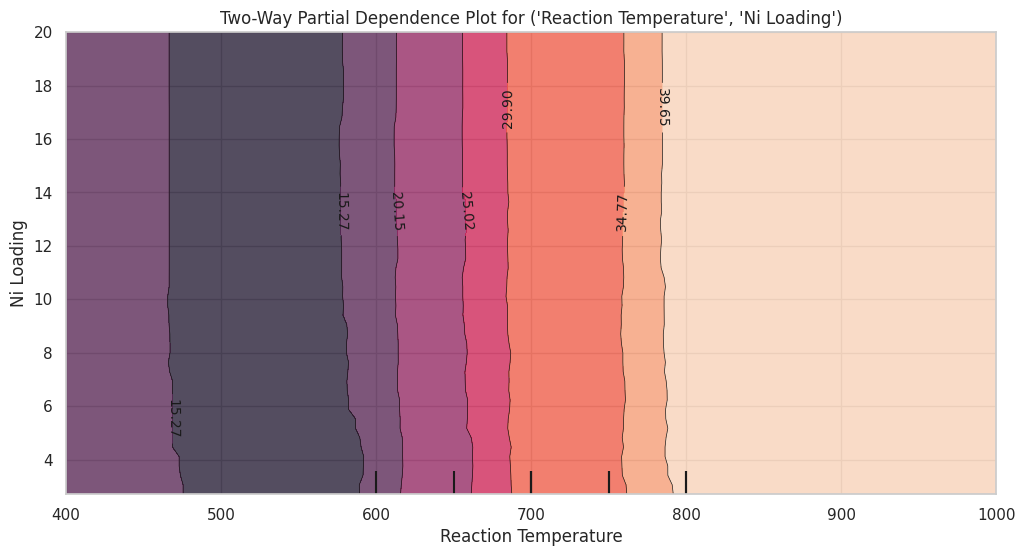

Best Parameters for Syngas_Ratio: {'bootstrap': True, 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 58}


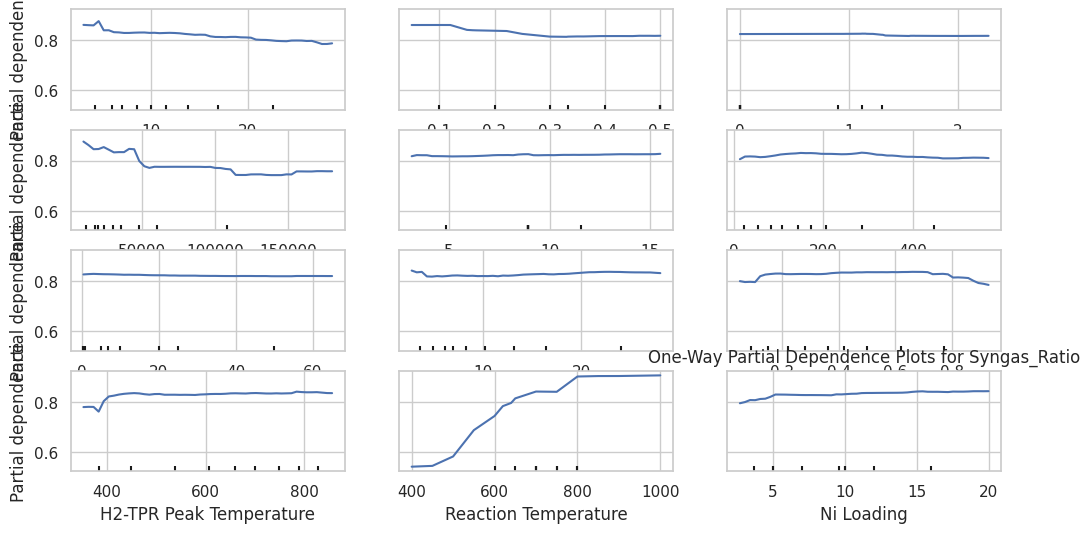

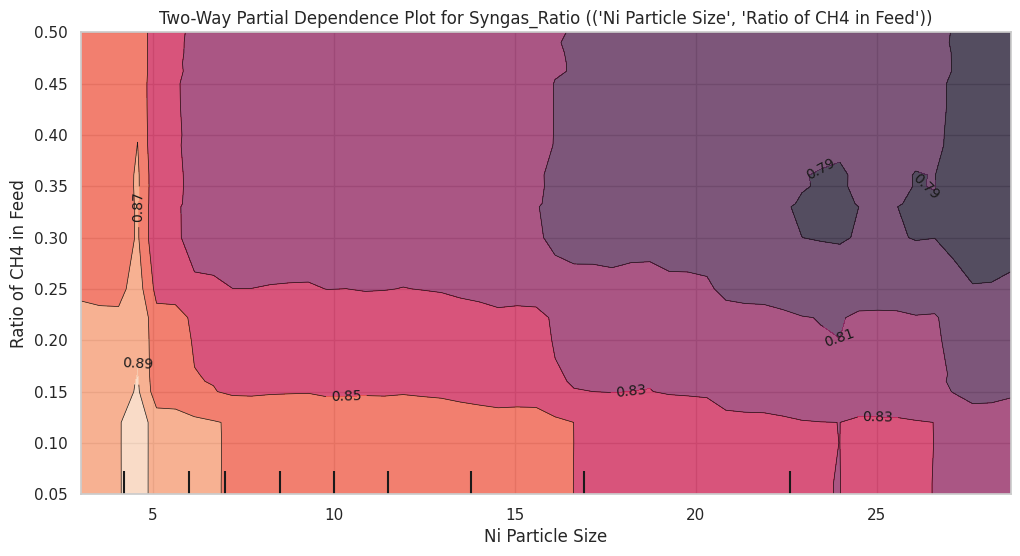

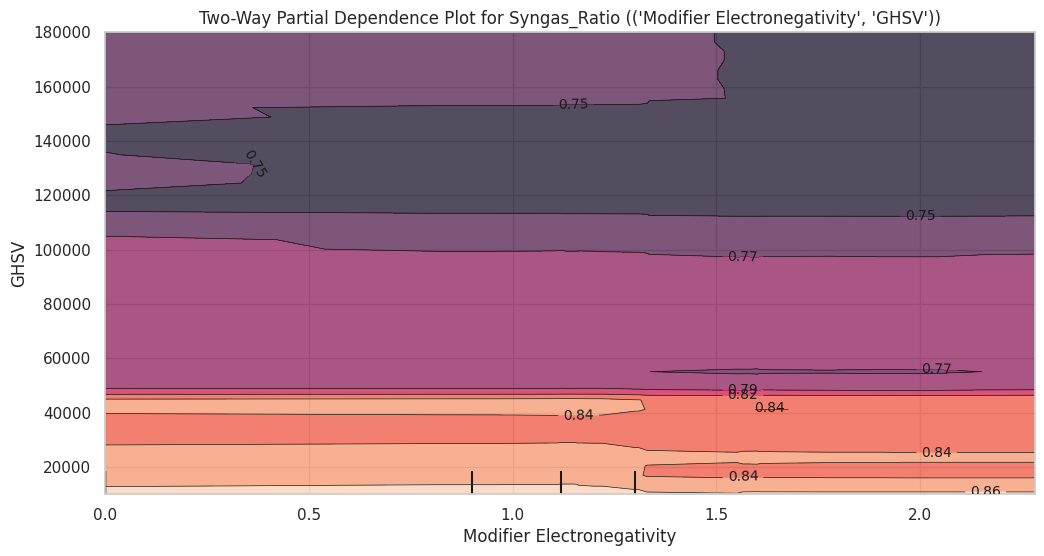

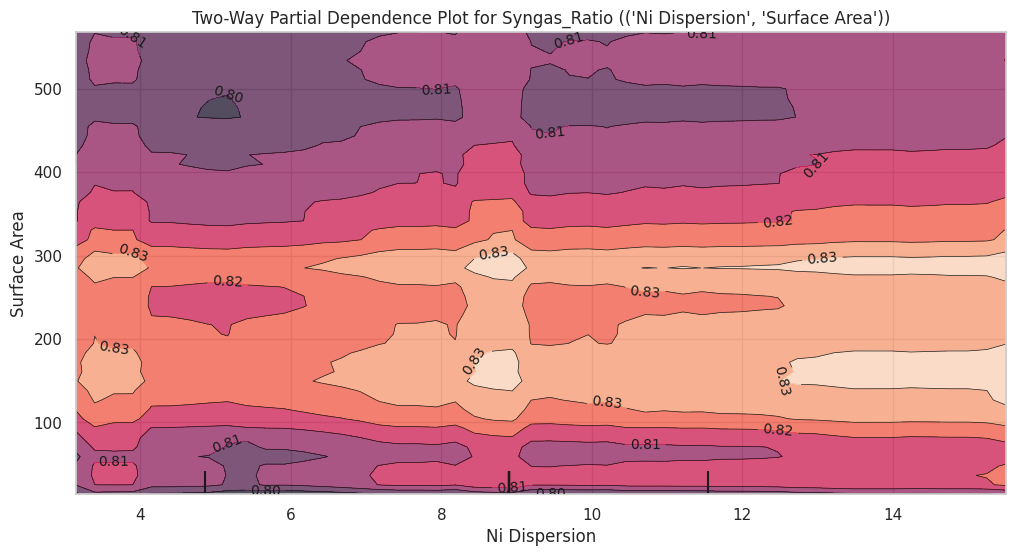

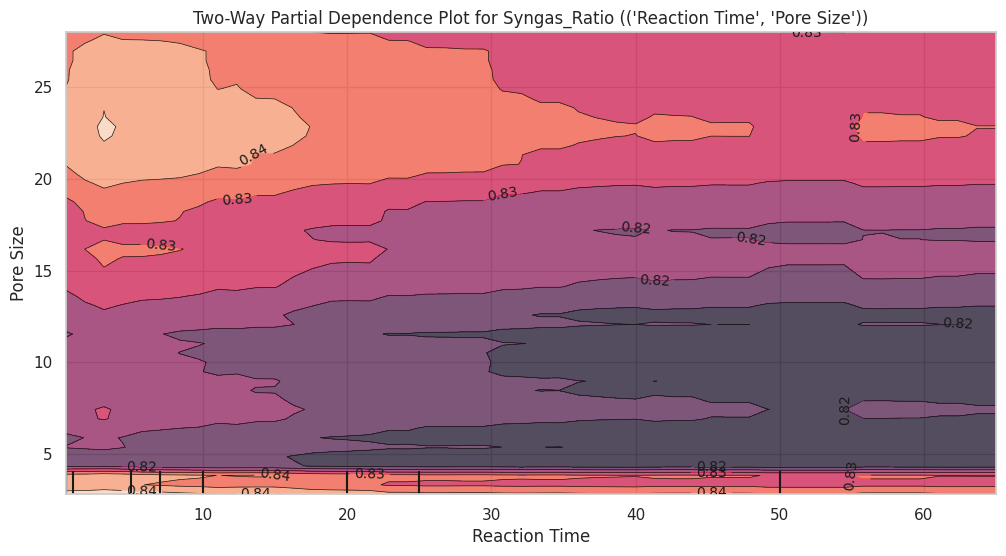

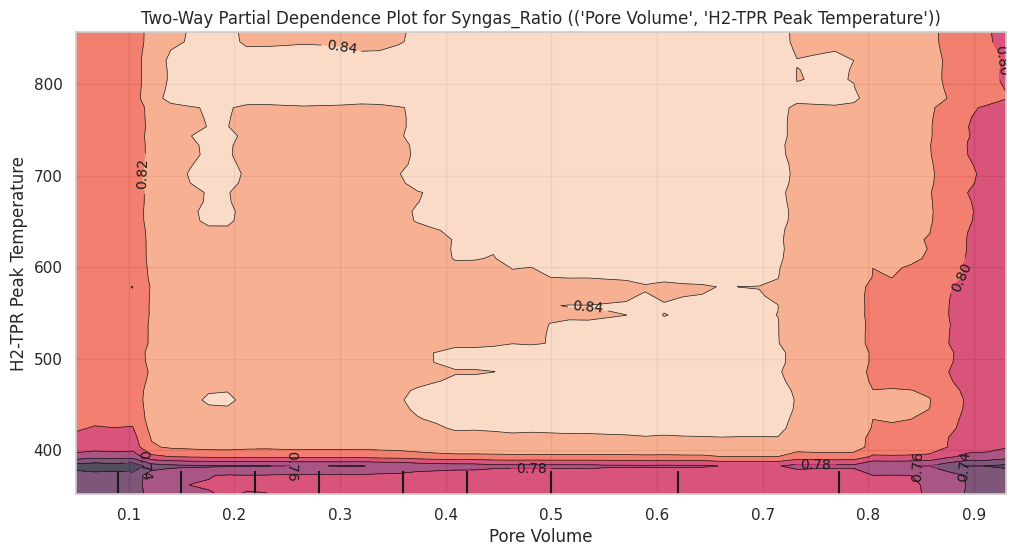

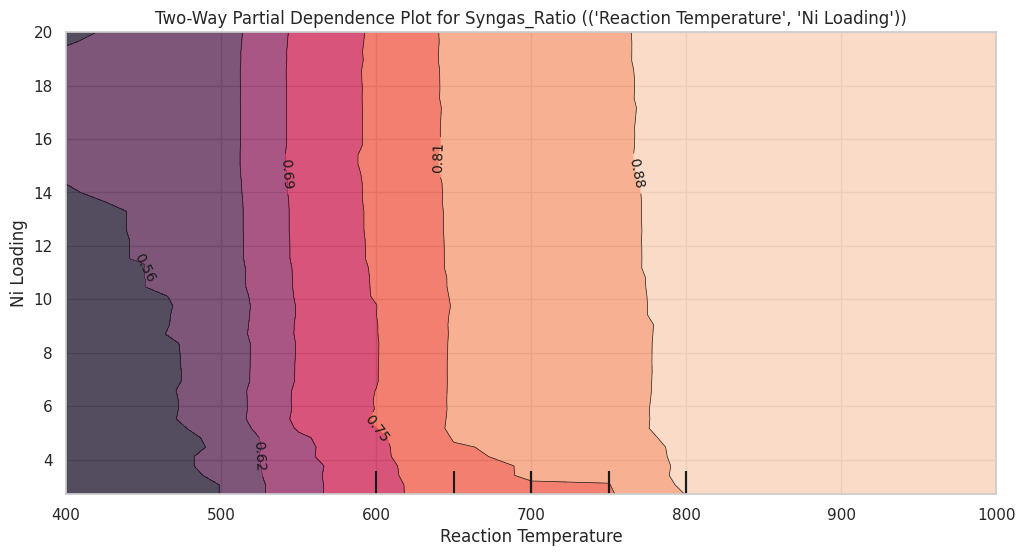

Best Parameters for CO2 Conversion: {'bootstrap': True, 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 58}


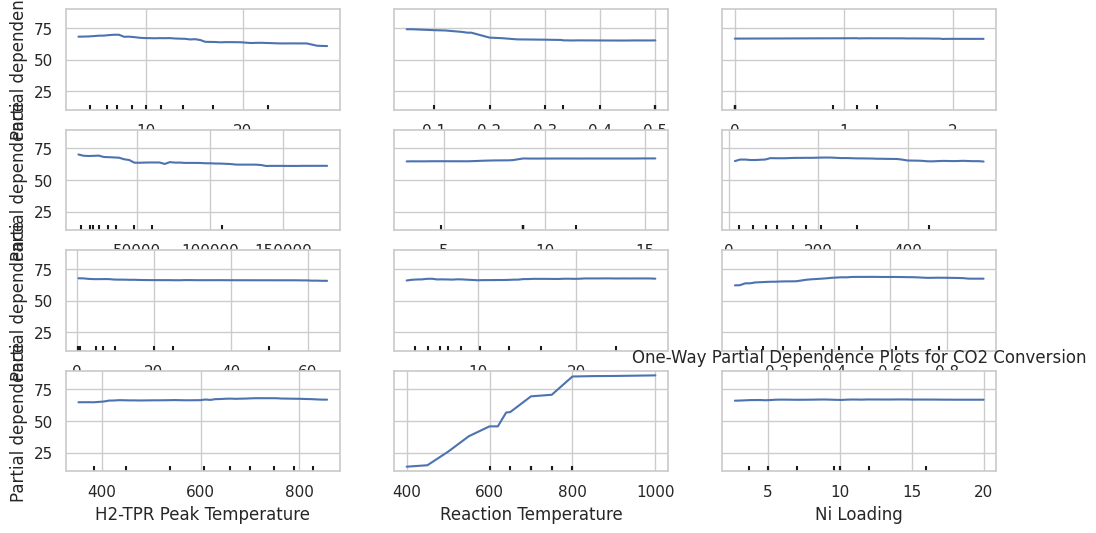

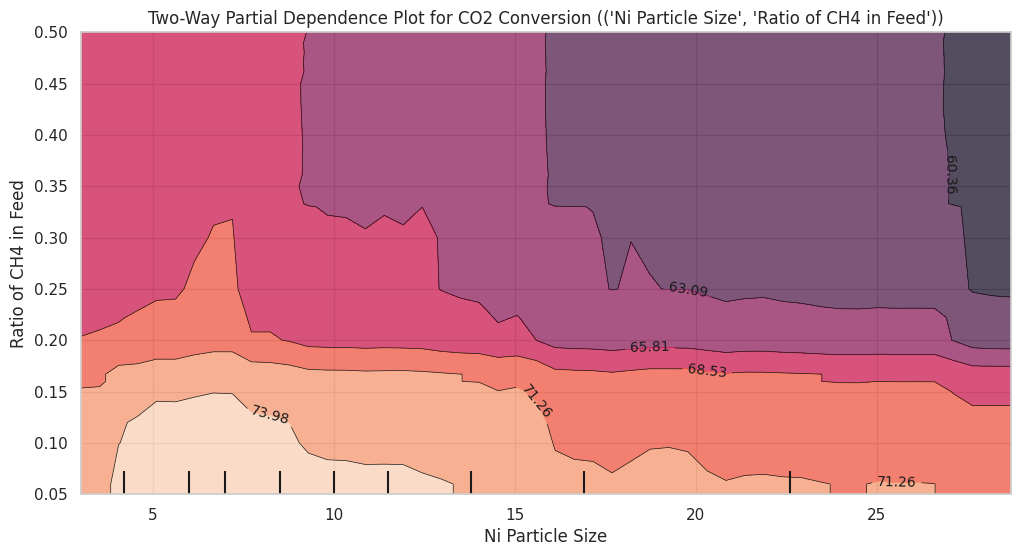

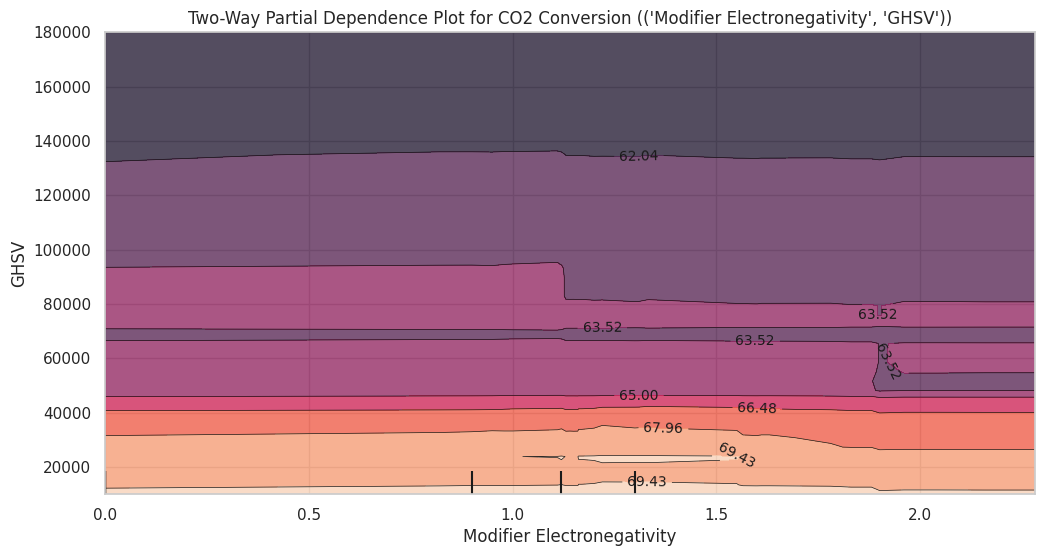

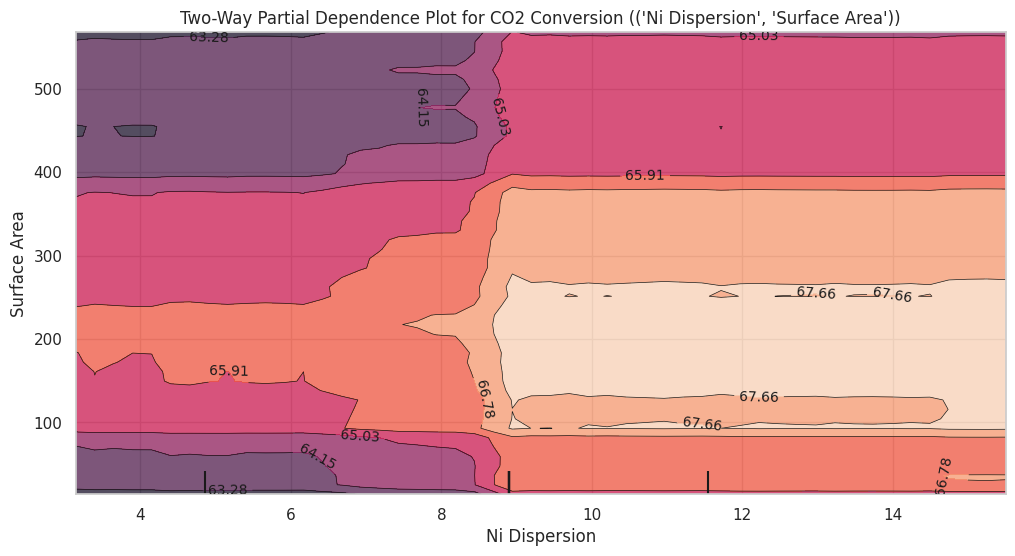

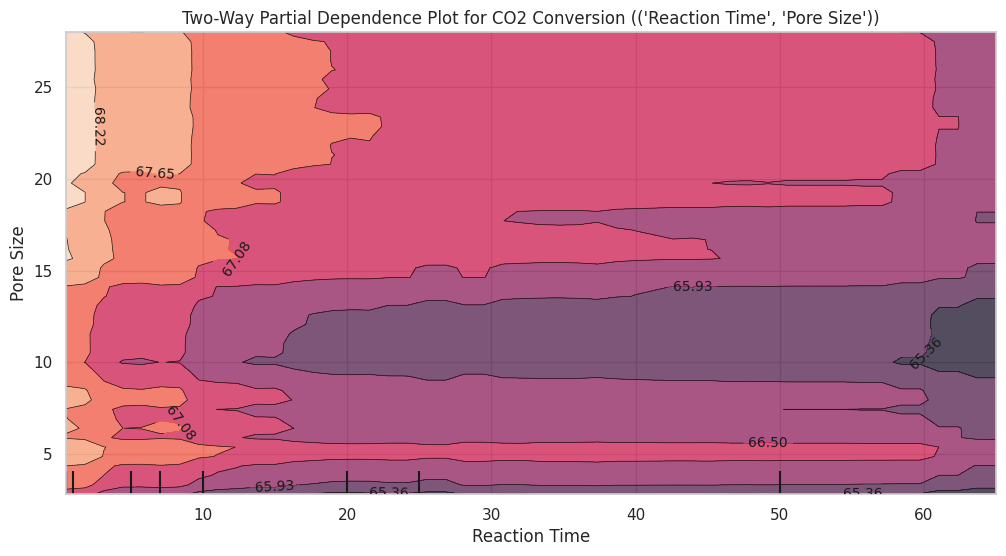

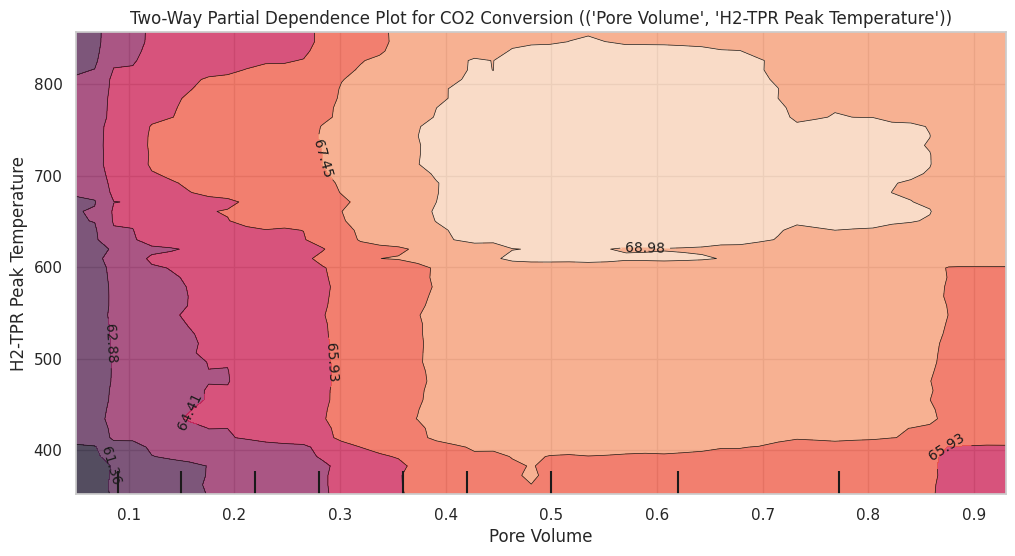

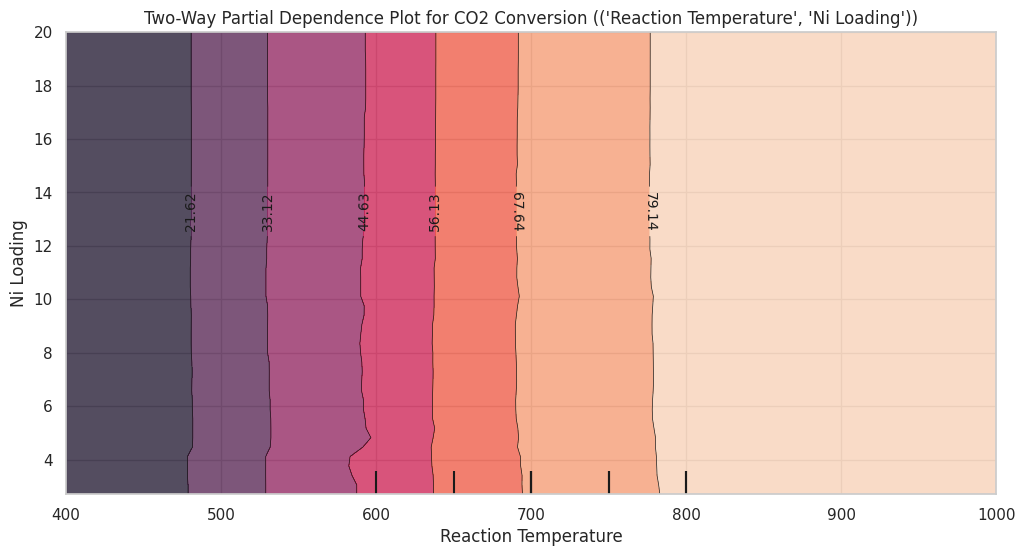

Best Parameters for CH4 Conversion: {'bootstrap': True, 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 58}


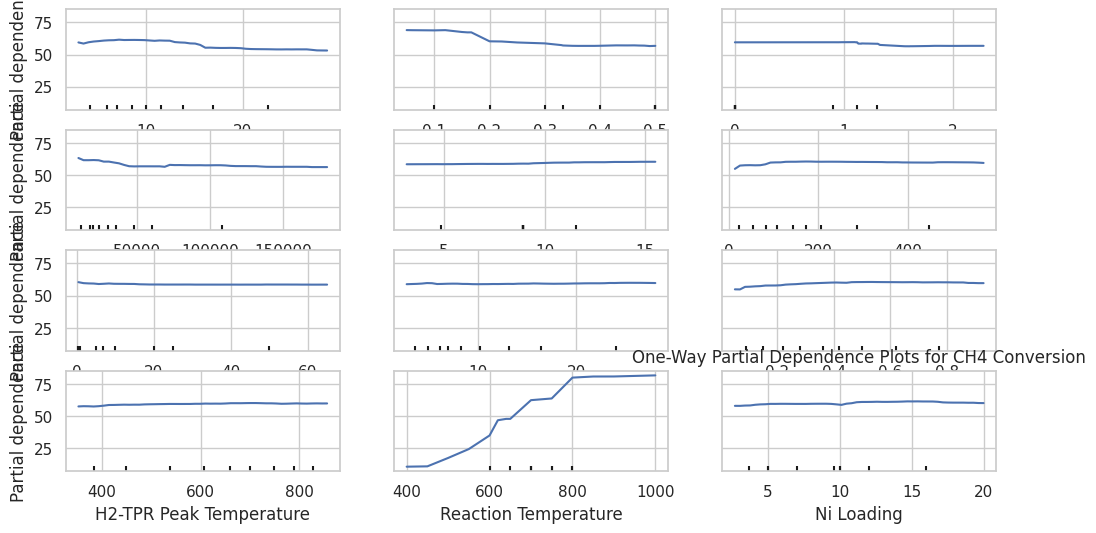

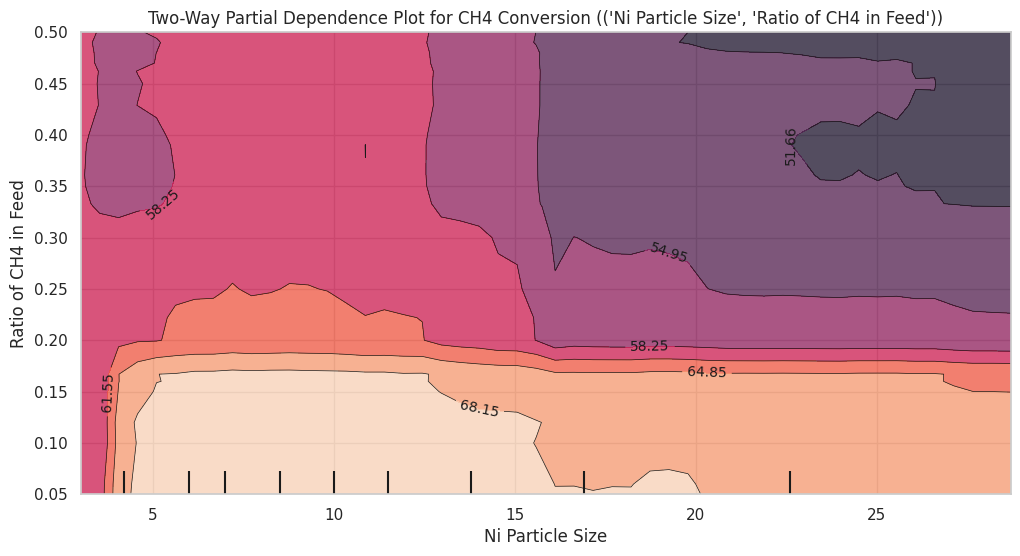

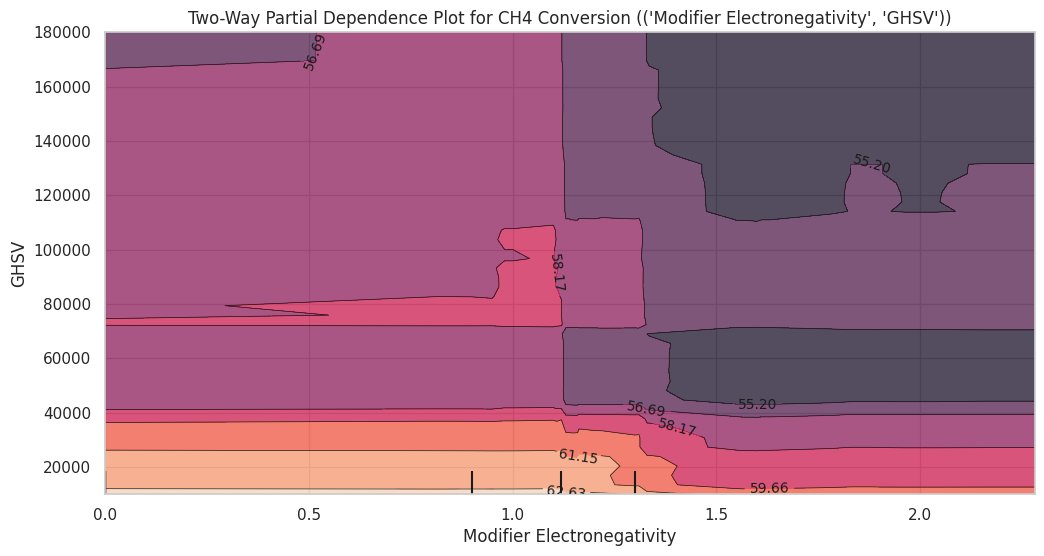

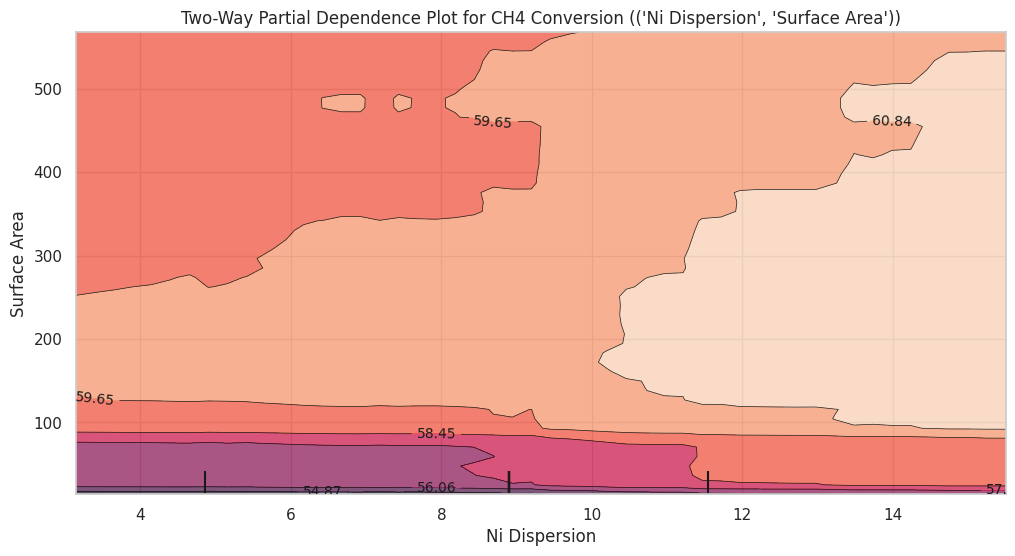

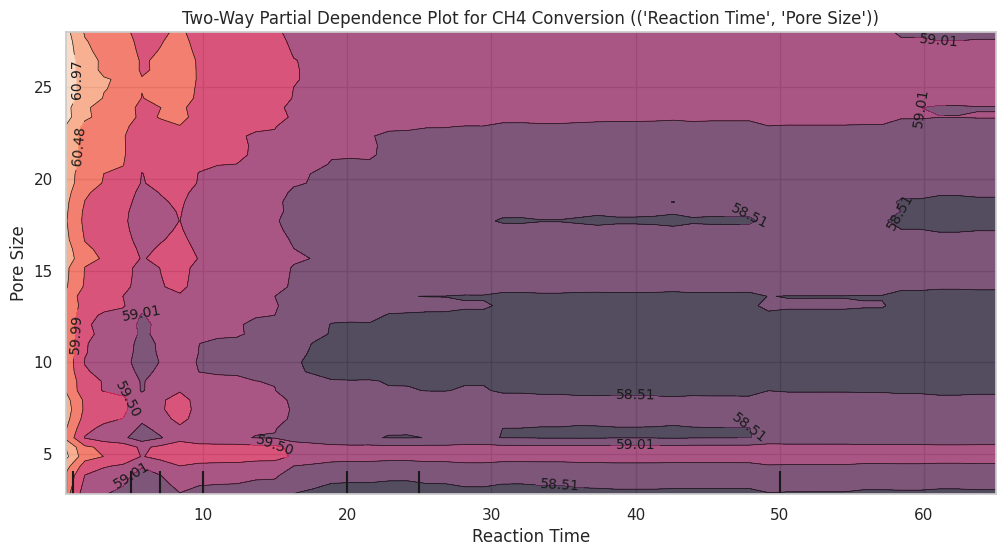

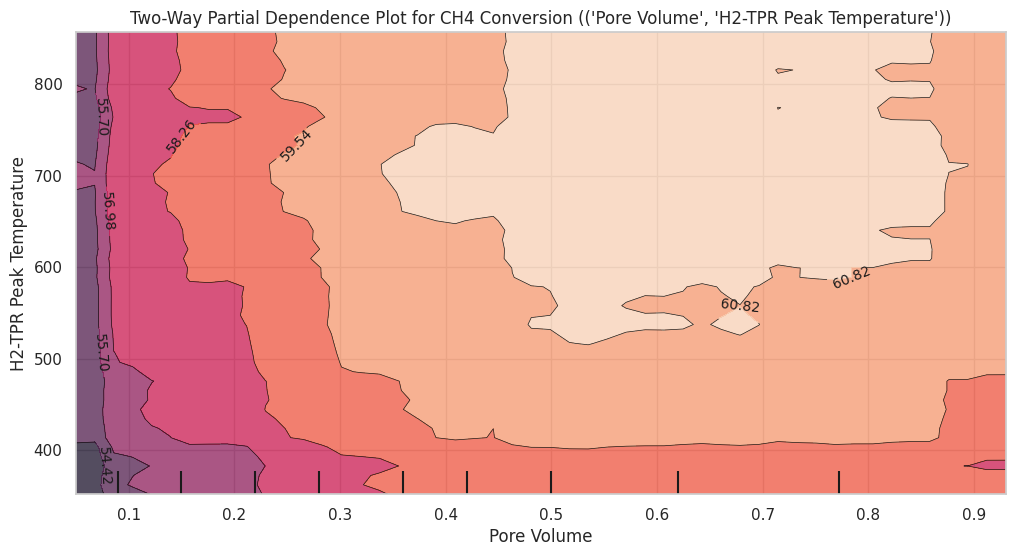

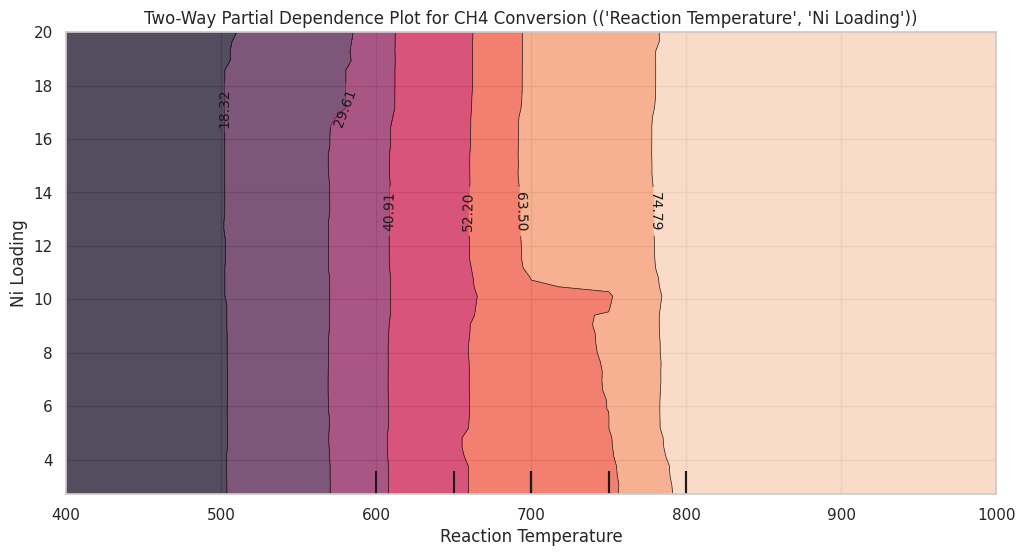

In [16]:
# Install specific versions of libraries
!pip install pandas==2.2.2 numpy==1.23.5 matplotlib seaborn scikit-learn openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import randint

# Load your dataset
try:
    df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

# Check the dataframe info and ensure the target variable exists
print(df.info())

# List of features and target variables
features = ['Ni Loading', 'Surface Area', 'GHSV', 'Ratio of CH4 in Feed', 'Reaction Temperature',
            'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature', 'Ni Particle Size',
            'Ni Dispersion', 'Modifier Electronegativity']

target_variables = ['Syngas_Ratio', 'CO2 Conversion', 'CH4 Conversion']

# Remove only the first column
df = df.drop(df.columns[0], axis=1)

# Check if all target columns exist in the dataframe before proceeding
for target in target_variables:
    if target not in df.columns:
        raise KeyError(f"Target column '{target}' not found in the dataset.")

# Define features (X) and target variables (y)
X = df[features]
y = df[target_variables]

# Replace missing values with the mean of each column
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForest model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_depth': [None] + list(range(5, 21)),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=30, cv=5,
                                   scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)

# Fit the model using RandomizedSearchCV
try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error during fitting: {e}")
    exit()

# Output the best parameters found by RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

# Refit the best model with the optimal parameters
best_rf_model = random_search.best_estimator_

# One-way Partial Dependence Plot for feature importance
features_one_way = ['Ni Particle Size','Ratio of CH4 in Feed','Modifier Electronegativity', 'GHSV', 'Ni Dispersion', 'Surface Area', 'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature','Reaction Temperature', 'Ni Loading']

# Check if features exist in the DataFrame
for feature in features_one_way:
    if feature not in X.columns:
        raise ValueError(f"Feature '{feature}' not found in the DataFrame.")

# Create and display the Partial Dependence Plot
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_rf_model, X_train, features=features_one_way, ax=ax, grid_resolution=50)
plt.title('One-Way Partial Dependence Plots')
plt.show()

# Two-way Partial Dependence Plot (Now only pairs of features)
# Define pairs of features for two-way plots (now using two features per plot)
features_two_way = [
    ('Ni Particle Size', 'Ratio of CH4 in Feed'),
    ('Modifier Electronegativity', 'GHSV'),
    ('Ni Dispersion', 'Surface Area'),
    ('Reaction Time', 'Pore Size'),
    ('Pore Volume', 'H2-TPR Peak Temperature'),
    ('Reaction Temperature', 'Ni Loading')
]

# Loop through each pair and create a 2D PDP for it
for feature_pair in features_two_way:
    fig, ax = plt.subplots(figsize=(12, 6))
    PartialDependenceDisplay.from_estimator(best_rf_model, X_train, features=[feature_pair], ax=ax, grid_resolution=50)
    plt.title(f'Two-Way Partial Dependence Plot for {feature_pair}')
    plt.show()

# For multiple target variables, you can repeat the above steps in a loop
for target_variable in target_variables:
    # Check if the target variable exists in the DataFrame
    if target_variable not in df.columns:
        print(f"Target column '{target_variable}' not found. Skipping this target.")
        continue

    # Define features (X) and target variable (y)
    y = df[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model using RandomizedSearchCV
    random_search.fit(X_train, y_train)

    # Output the best parameters found by RandomizedSearchCV for the current target variable
    print(f"Best Parameters for {target_variable}: {random_search.best_params_}")

    # Refit the best model with the optimal parameters for the current target variable
    best_rf_model = random_search.best_estimator_

    # One-way Partial Dependence Plot for feature importance for the current target variable
    features_one_way = ['Ni Particle Size','Ratio of CH4 in Feed','Modifier Electronegativity', 'GHSV', 'Ni Dispersion', 'Surface Area', 'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature','Reaction Temperature', 'Ni Loading']  # Example features to plot

    # Check if features exist in the DataFrame
    for feature in features_one_way:
        if feature not in X.columns:
            raise ValueError(f"Feature '{feature}' not found in the DataFrame.")

    # Create and display the Partial Dependence Plot for the current target variable
    fig, ax = plt.subplots(figsize=(12, 6))
    PartialDependenceDisplay.from_estimator(best_rf_model, X_train, features=features_one_way, ax=ax, grid_resolution=50)
    plt.title(f'One-Way Partial Dependence Plots for {target_variable}')
    plt.show()

    # Two-way Partial Dependence Plot for the current target variable
    features_two_way = [
        ('Ni Particle Size', 'Ratio of CH4 in Feed'),
        ('Modifier Electronegativity', 'GHSV'),
        ('Ni Dispersion', 'Surface Area'),
        ('Reaction Time', 'Pore Size'),
        ('Pore Volume', 'H2-TPR Peak Temperature'),
        ('Reaction Temperature', 'Ni Loading')
    ]

    # Loop through each pair and create a 2D PDP for it
    for feature_pair in features_two_way:
        fig, ax = plt.subplots(figsize=(12, 6))
        PartialDependenceDisplay.from_estimator(best_rf_model, X_train, features=[feature_pair], ax=ax, grid_resolution=50)
        plt.title(f'Two-Way Partial Dependence Plot for {target_variable} ({feature_pair})')
        plt.show()


Bee-swarm plot

In [31]:
# Install specific versions of libraries to avoid conflicts
!pip install pandas==1.5.3 numpy==1.23.5 matplotlib seaborn scikit-learn openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
try:
    df = pd.read_excel('/content/cleaned_data_no_missing_values_numerical.xlsx')
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

# List of features and target variables
features = ['Ni Loading', 'Surface Area', 'GHSV', 'Ratio of CH4 in Feed', 'Reaction Temperature',
            'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature', 'Ni Particle Size',
            'Ni Dispersion', 'Modifier Electronegativity']

target_variables = ['Syngas_Ratio', 'CO2 Conversion', 'CH4 Conversion']

# Ensure all target variables exist in the dataframe
for target_variable in target_variables:
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataframe.")

# Remove the first column (if needed)
df = df.drop(df.columns[0], axis=1)

# Define features (X) and target variables (y)
X = df[features]

# Replace missing values with the mean of each column
X = X.fillna(X.mean())

# Check for remaining missing values
if X.isnull().any().any():
    raise ValueError("There are still missing values in the dataset after imputation.")

# Bee-swarm plots for each target variable against the features
# Adjust figure size based on the number of features and target variables
fig, axes = plt.subplots(len(target_variables), len(features), figsize=(15, 10))

# Loop through each target variable to generate plots
for j, target_variable in enumerate(target_variables):
    df_combined = df[features + [target_variable]]

    # Loop through each feature and plot against the target variable
    for i, feature in enumerate(features):
        # Generate the bee-swarm plot
        sns.swarmplot(x=feature, y=target_variable, data=df_combined, color='blue', alpha=0.6, ax=axes[j, i])

        # Set titles and labels
        axes[j, i].set_title(f'{target_variable} vs {feature}')
        axes[j, i].set_xlabel(feature)
        axes[j, i].set_ylabel(target_variable)

# Adjust layout to fit all subplots
plt.tight_layout()

# Show the plots
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you h

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be plac

Created dataset file at: .gradio/flagged/dataset1.csv


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 78.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:33

<Figure size 640x480 with 0 Axes>

#Hugging face user interface

In [32]:
# Install specific versions of libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle
import gradio as gr

# Dynamically resolve file path using os
file_path = os.path.join(os.getcwd(), "cleaned_data_no_missing_values_numerical.xlsx")

# Load dataset
df = pd.read_excel(file_path)

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns.tolist())

# Remove the first column
df = df.iloc[:, 1:]

# Define the updated feature columns
features = ['Ni Loading', 'Surface Area', 'GHSV', 'Ratio of CH4 in Feed', 'Reaction Temperature',
            'Reaction Time', 'Pore Size', 'Pore Volume', 'H2-TPR Peak Temperature', 'Ni Particle Size',
            'Ni Dispersion', 'Modifier Electronegativity']

# Define multiple target variables
target_variables = ['Syngas_Ratio', 'CO2 Conversion', 'CH4 Conversion']

# Check if all required feature columns exist
missing_columns = [col for col in features if col not in df.columns]
if missing_columns:
    raise KeyError(f"Missing required columns: {missing_columns}")

# Prepare the data
X = df[features]  # Only use the features
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # Fill any remaining NaN values with 0

# Define models to be used
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
}

# Train models for each target variable and save the best one
best_models = {}
for target_variable in target_variables:
    y = df[target_variable]  # Separate target variable for training

    best_score = -np.inf
    best_model = None
    for model_name, model in models.items():
        try:
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_model = (model_name, model)
        except Exception as e:
            print(f"Warning: Failed to train {model_name} for {target_variable}: {e}")

    if best_model:
        model_name, model = best_model
        model.fit(X, y)
        with open(f'best_{model_name}_{target_variable}.pkl', 'wb') as model_file:
            pickle.dump(model, model_file)
        best_models[target_variable] = (model_name, model)

# Define Gradio app for the updated feature set
def predict_catalyst_metrics(Reaction_Temperature, Ratio_of_CH4_in_Feed, Ni_Loading, Surface_Area,
                              GHSV, Reaction_Time, Pore_Size, Pore_Volume, H2_TPR_Peak_Temperature,
                              Ni_Particle_Size, Ni_Dispersion, Modifier_Electronegativity):
    # Create input data for prediction
    input_data = pd.DataFrame({
        'Reaction Temperature': [Reaction_Temperature],
        'Ratio of CH4 in Feed': [Ratio_of_CH4_in_Feed],
        'Ni Loading': [Ni_Loading],
        'Surface Area': [Surface_Area],
        'GHSV': [GHSV],
        'Reaction Time': [Reaction_Time],
        'Pore Size': [Pore_Size],
        'Pore Volume': [Pore_Volume],
        'H2-TPR Peak Temperature': [H2_TPR_Peak_Temperature],
        'Ni Particle Size': [Ni_Particle_Size],
        'Ni Dispersion': [Ni_Dispersion],
        'Modifier Electronegativity': [Modifier_Electronegativity],
    })

    # Ensure the input data has the same structure as X
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    predictions = {}
    for output_name in target_variables:
        try:
            model_name, model = best_models[output_name]
            prediction = model.predict(input_data)[0]
            # Add the unit to the prediction result
            if output_name == 'Syngas_Ratio':
                predictions[f'{model_name} - {output_name}'] = f"{prediction:.2f} (unitless)"
            elif output_name == 'CO2 Conversion':
                predictions[f'{model_name} - {output_name}'] = f"{prediction:.2f} (%)"
            elif output_name == 'CH4 Conversion':
                predictions[f'{model_name} - {output_name}'] = f"{prediction:.2f} (%)"
        except Exception as e:
            predictions[f'{output_name}'] = f"Error: {e}"
    return predictions

# Gradio Interface with Units
inputs = [
    gr.Number(label='Reaction Temperature (°C)', value=0, precision=2),
    gr.Number(label='Ratio of CH4 in Feed', value=0, precision=2),
    gr.Number(label='Ni Loading (%)', value=0, precision=2),
    gr.Number(label='Surface Area (m²/g)', value=0, precision=2),
    gr.Number(label='GHSV (h⁻¹)', value=0, precision=2),
    gr.Number(label='Reaction Time (hours)', value=0, precision=2),
    gr.Number(label='Pore Size (nm)', value=0, precision=2),
    gr.Number(label='Pore Volume (cm³/g)', value=0, precision=2),
    gr.Number(label='H2-TPR Peak Temperature (°C)', value=0, precision=2),
    gr.Number(label='Ni Particle Size (nm)', value=0, precision=2),
    gr.Number(label='Ni Dispersion (%)', value=0, precision=2),
    gr.Number(label='Modifier Electronegativity', value=0, precision=2),
]

# Output is JSON with the prediction results
outputs = gr.JSON()

# Define Gradio interface
app = gr.Interface(fn=predict_catalyst_metrics,
                   inputs=inputs,
                   outputs=outputs,
                   title='Catalyst Performance Prediction during Dry Reforming of Methane',
                   description="Predict Syngas Ratio, CO2 Conversion, and CH4 Conversion based on catalyst metrics. Units will be displayed with the results.")

# Launch the app
if __name__ == "__main__":
    app.launch()


Columns in the DataFrame: ['Catalyst', 'Ratio of CH4 in Feed', 'Reaction Temperature', 'Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area', 'H2-TPR Peak Temperature', 'Ni Particle Size', 'Ni Dispersion', 'Modifier Electronegativity', 'GHSV', 'CH4 Conversion', 'CO2 Conversion', 'Syngas_Ratio']
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f1f08b347b949626da.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#References

https://chatgpt.com/

https://gemini.google.com/app

D. Chinenye Divine et. al. (2024). Enhancing biomass pyrolysis: Predictive insights from process simiulation integrated with interpretable machine learning models

J.Roh et al. (2023).Interpretable machine learning framework for catalyst performance prediction and validation with dry reforming of methane. https://doi.org/10.1016/j.apcatb.2023.123454

Muhammad Asif et al (2024)
Machine learning-driven catalyst design, synthesis and performance prediction for CO2 hydrogenation, Journal of Industrial and Engineering Chemistry. https://doi.org/10.1016/j.jiec.2024.09.035

T.S. Gendey et al. (2024). Enhanced Predcitive Optimization of methane dry reforming via ResponseSurface methodology and artificial neural network approaches: Insights using a novel nickel-strontium-zirconium-aluminum catalyst  https://doi.org/10.1016/j.mcat.2024.114216